Сделать заголовки и содержание

Изменения которы делаются в разделе EDA (Конвертация дроби + новые колонки) нужно вынести отдельной функцией и сохранить измененнный датасет для Леонида

In [2]:
import numpy as np
import pandas as pd

# визуализация
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
from fractions import Fraction

from wordcloud import WordCloud

Пути

In [2]:
rating_data = pd.read_csv('Books_rating.csv')
books_data = pd.read_csv('books_data.csv')

Нужно удалить солонку 	Unnamed: 0

In [3]:
rating_data = pd.read_csv('Rating_data_with_additional.csv')

In [3]:
rating_data.head()

Id                           Title  Price         User_id  \
0  1882931173  Its Only Art If Its Well Hung!    NaN   AVCGYZL8FQQTD   
1  0826414346        Dr. Seuss: American Icon    NaN  A30TK6U7DNS82R   
2  0826414346        Dr. Seuss: American Icon    NaN  A3UH4UZ4RSVO82   
3  0826414346        Dr. Seuss: American Icon    NaN  A2MVUWT453QH61   
4  0826414346        Dr. Seuss: American Icon    NaN  A22X4XUPKF66MR   

                          profileName  review/helpfulness  review/score  \
0               Jim of Oz "jim-of-oz"            1.000000           4.0   
1                       Kevin Killian            1.000000           5.0   
2                        John Granger            0.909091           5.0   
3  Roy E. Perry "amateur philosopher"            1.000000           4.0   
4     D. H. Richards "ninthwavestore"            1.000000           4.0   

  review/time                                   review/summary  \
0  1999-10-23           Nice collection of Julie Strain images   
1  2004-09-21                                Really Enjoyed It   
2  2004-03-09  Essential for every personal and Public Library   
3  2004-07-25  Phlip Nel gives silly Seuss a serious treatment   
4  2005-02-10                           Good academic overview   

                                         review/text  review/month  \
0  This is only for Julie Strain fans. It's a col...            10   
1  I don't care much for Dr. Seuss but after read...             9   
2  If people become the books they read and if "t...             3   
3  Theodore Seuss Geisel (1904-1991), aka &quot;D...             7   
4  Philip Nel - Dr. Seuss: American IconThis is b...             2   

   review/day  review/year  review/summary_char_len  review/summary_words_len  \
0          23         1999                       38                         6   
1          21         2004                       17                         3   
2           9         2004                       47                         7   
3          25         2004                       47                         8   
4          10         2005                       22                         3   

   review/text_char_len  review/text_words_len  
0                   457                     86  
1                  1423                    252  
2                  1752                    310  
3                  3662                    560  
4                  1542                    273

# EDA

## Анализ датасета в целом

In [3]:
rating_data.sample(n=5, random_state=42)

Id                                              Title  Price  \
2945667  B0006CR6U4  A dictionary of the Targumim, the Talmud Babli...    NaN   
2352586  0897166159           Espresso Coffee: Professional Techniques    NaN   
1531260  0736693408  The First King of Shannara (The Sword of Shann...    NaN   
941910   0395051029             Wuthering Heights (Riverside editions)    NaN   
2582125  4770016050  A Cat, a Man, and Two Women (Japans Modern Wri...    NaN   

                User_id                 profileName review/helpfulness  \
2945667  A303XPDO694V6X                       Ariel                2/6   
2352586  A3780H4TM9RMB8                David barnes                0/1   
1531260  A1AX6VPDQQZDPV                   M Carlton                4/4   
941910   A35RQKCCCQ62O0                       LadyJ                0/0   
2582125  A2IJQDE1I4SIJT  David C. Arnold "master D"                1/2   

         review/score  review/time                          review/summary  \
2945667           4.0   1122163200                                 Jastrow   
2352586           2.0   1356912000                            NOT the book   
1531260           5.0   1105574400             Great (what do you expect?)   
941910            4.0   1353888000                               Satisfied   
2582125           5.0   1167955200  Ordered 09/02/2006, still on backorder   

                                               review/text  
2945667  Jastrow made a great workthis dictionary can h...  
2352586  Extremely disappointed by the SHORT length and...  
1531260  This, like all of Brook's Shannara series book...  
941910   I enjoyed this classic. I didn't know the stor...  
2582125  I would love to read this book. Have accepted ...

In [6]:
books_data.sample(n=5, random_state=42)

Title  \
71763   The Evolution of Physics: The Growth of Ideas ...   
170424                                        Love is Now   
81510                                   Lustful Turk, The   
23661                                         Rebel Waltz   
193241  Mobil 99: America's Best Hotels & Restaurants ...   

                                              description  \
71763   Clear and concise explanations of the developm...   
170424  Ram Dass’s long-awaited Be Love Now is the tra...   
81510                                                 NaN   
23661   From a "New York Times"-bestselling author com...   
193241  Road maps for ten states and three Canadian pr...   

                                            authors  \
71763         ['Albert Einstein', 'Leopold Infeld']   
170424                ['Ram Dass', 'Rameshwar Das']   
81510                                           NaN   
23661                                ['Kay Hooper']   
193241  ["Fodor's Travel Publications, Inc. Staff"]   

                                                    image  \
71763   http://books.google.com/books/content?id=lWEmN...   
170424  http://books.google.com/books/content?id=ZCAOH...   
81510                                                 NaN   
23661   http://books.google.com/books/content?id=E_tvD...   
193241  http://books.google.com/books/content?id=7eRL4...   

                                              previewLink  \
71763   http://books.google.com/books?id=lWEmNBaHCJMC&...   
170424  http://books.google.com/books?id=ZCAOHdptArYC&...   
81510                                                 NaN   
23661   http://books.google.com/books?id=E_tvDwAAQBAJ&...   
193241  http://books.google.com/books?id=7eRL4pNAO0wC&...   

                         publisher publishedDate  \
71763           Simon and Schuster          1966   
170424              Harper Collins    2010-11-02   
81510                          NaN           NaN   
23661                       Bantam          2009   
193241  Fodors Travel Publications          1999   

                                                 infoLink  \
71763   http://books.google.com/books?id=lWEmNBaHCJMC&...   
170424  https://play.google.com/store/books/details?id...   
81510                                                 NaN   
23661   http://books.google.com/books?id=E_tvDwAAQBAJ&...   
193241  http://books.google.com/books?id=7eRL4pNAO0wC&...   

                     categories  ratingsCount  
71763             ['Reference']           4.0  
170424  ['Body, Mind & Spirit']           NaN  
81510                       NaN           NaN  
23661               ['Fiction']           1.0  
193241               ['Travel']           NaN

In [7]:
rating_data.shape

(3000000, 10)

In [8]:
books_data.shape

(212404, 10)

In [9]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [10]:
books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


РАЗОБРАТЬСЯ С ДУБЛИКАТАМИ

In [11]:
rating_data.duplicated().sum()

8774

In [12]:
books_data.duplicated().sum()

0

In [13]:
nan_data_raithings = rating_data.isna()

In [14]:
nan_data_raithings.sum() / len(nan_data_raithings) * 100

Id                     0.000000
Title                  0.006933
Price                 83.960967
User_id               18.726233
profileName           18.729533
review/helpfulness     0.000000
review/score           0.000000
review/time            0.000000
review/summary         0.001267
review/text            0.000267
dtype: float64

На будущее: Сделать размер фигуры побольше, для того, чтобы видеть nan-ы в последних двух столбцах

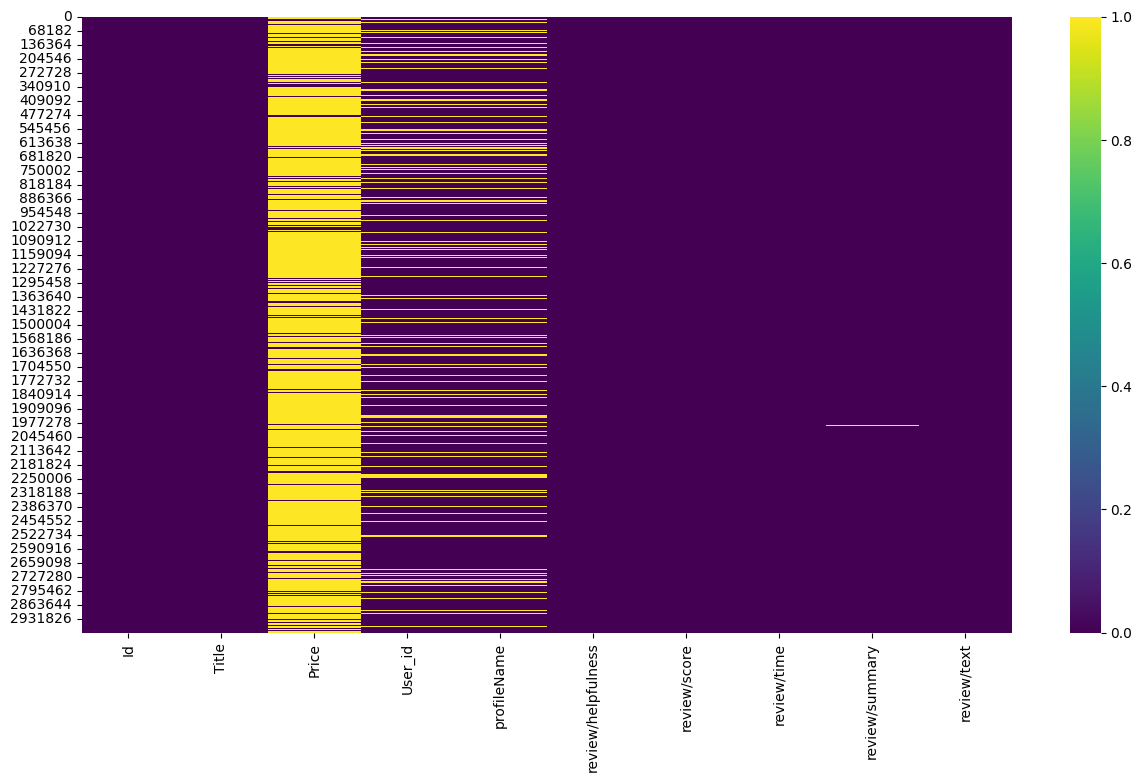

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(nan_data_raithings, cmap="viridis");

In [16]:
nan_data_books = books_data.isna()
nan_data_books.sum() / len(nan_data_books) * 100

Title             0.000471
description      32.222557
authors          14.789270
image            24.516958
previewLink      11.222011
publisher        35.727199
publishedDate    11.913617
infoLink         11.222011
categories       19.396527
ratingsCount     76.576712
dtype: float64

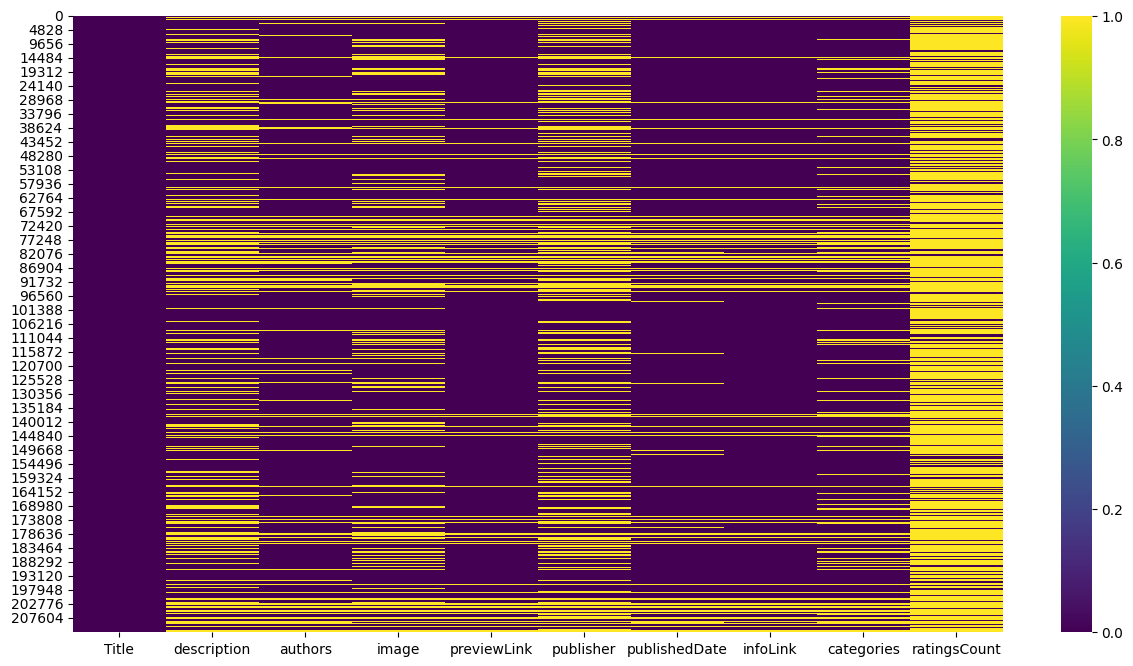

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(nan_data_books, cmap="viridis");

In [18]:
rating_data.columns

Index(['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text'],
      dtype='object')

In [19]:
books_data.columns

Index(['Title', 'description', 'authors', 'image', 'previewLink', 'publisher',
       'publishedDate', 'infoLink', 'categories', 'ratingsCount'],
      dtype='object')

## Анализ урезанного датасета в целом

In [47]:
rating_data = rating_data[:10_000:]

In [116]:
rating_data.shape

(10000, 23)

In [119]:
nan_data_raithings = rating_data.isna()

In [120]:
nan_data_raithings.sum() / len(nan_data_raithings) * 100

Unnamed: 0                   0.00
Id                           0.00
Title                        0.00
Price                       85.86
User_id                     18.83
profileName                 18.83
review/helpfulness           0.00
review/score                 0.00
review/time                  0.00
review/summary               0.00
review/text                  0.00
review/month                 0.00
review/day                   0.00
review/year                  0.00
review/summary_char_len      0.00
review/summary_words_len     0.00
review/text_char_len         0.00
review/text_words_len        0.00
review/score_str             0.00
id_top_10                    0.00
title_top_10                 0.00
user_id_top_10               0.00
profile_name_top_10          0.00
dtype: float64

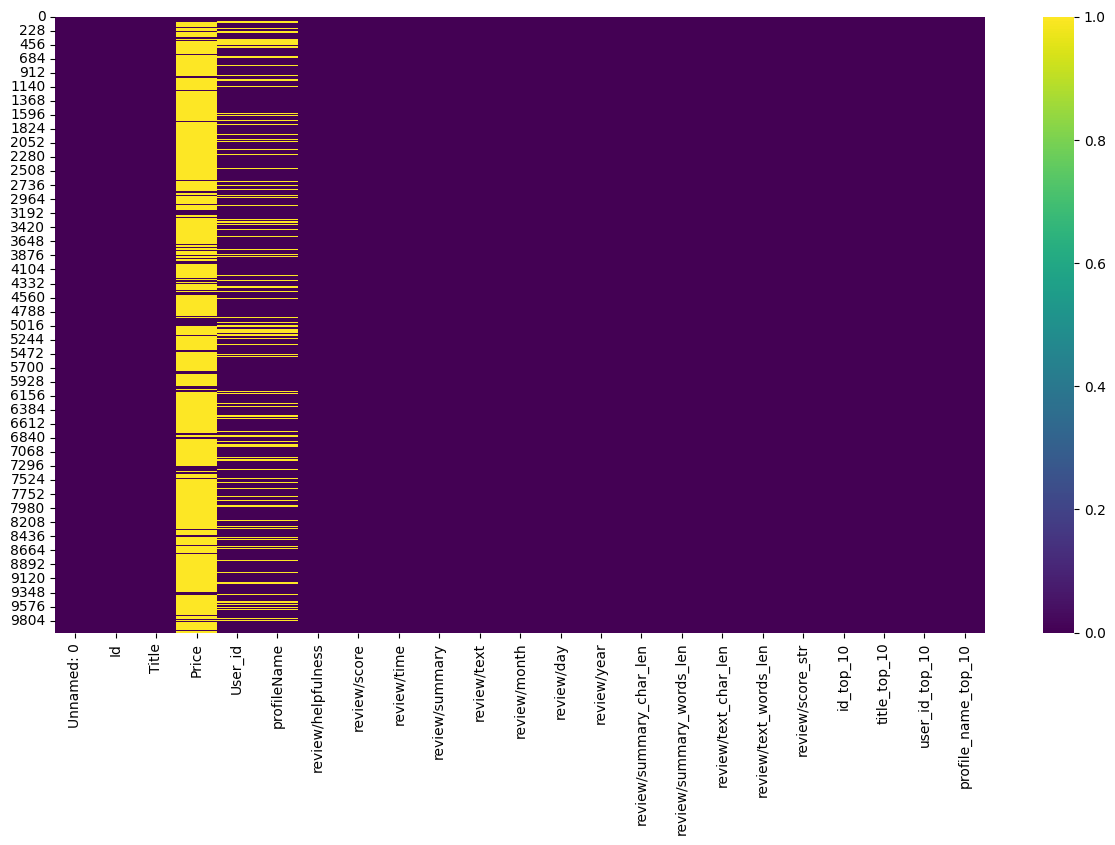

In [121]:
plt.figure(figsize=(15,8))
sns.heatmap(nan_data_raithings, cmap="viridis");

## Анализ и обработка отдельных признаков

В id и title надо сделать bar как в user_id

In [5]:
rating_data

Unnamed: 0          Id  \
0              0  1882931173   
1              1  0826414346   
2              2  0826414346   
3              3  0826414346   
4              4  0826414346   
...          ...         ...   
9995        9995  0714843016   
9996        9996  0714843016   
9997        9997  0714843016   
9998        9998  0714843016   
9999        9999  B000H573SU   

                                                  Title  Price  \
0                        Its Only Art If Its Well Hung!    NaN   
1                              Dr. Seuss: American Icon    NaN   
2                              Dr. Seuss: American Icon    NaN   
3                              Dr. Seuss: American Icon    NaN   
4                              Dr. Seuss: American Icon    NaN   
...                                                 ...    ...   
9995                                          Fish Face    NaN   
9996                                          Fish Face    NaN   
9997                                          Fish Face    NaN   
9998                                          Fish Face    NaN   
9999  The Solar Home Book: Heating, Cooling and Desi...    NaN   

             User_id                         profileName  review/helpfulness  \
0      AVCGYZL8FQQTD               Jim of Oz "jim-of-oz"            1.000000   
1     A30TK6U7DNS82R                       Kevin Killian            1.000000   
2     A3UH4UZ4RSVO82                        John Granger            0.909091   
3     A2MVUWT453QH61  Roy E. Perry "amateur philosopher"            1.000000   
4     A22X4XUPKF66MR     D. H. Richards "ninthwavestore"            1.000000   
...              ...                                 ...                 ...   
9995   AKI17M38FBHO3                      Mary Ann Payne            0.000000   
9996  A23RC1806MU14U         Jay E. Schwartz "livediver"            0.000000   
9997  A1T38WUVN5DHOW                         A. Gorozdos            0.000000   
9998  A3KPR36IFBPAPE                          G'town mom            0.000000   
9999  A2PEWRBLAMENWJ                                 Ron            1.000000   

      review/score review/time  \
0              4.0  1999-10-23   
1              5.0  2004-09-21   
2              5.0  2004-03-09   
3              4.0  2004-07-25   
4              4.0  2005-02-10   
...            ...         ...   
9995           5.0  2009-09-24   
9996           5.0  2008-07-10   
9997           3.0  2007-06-10   
9998           5.0  2007-01-09   
9999           5.0  2006-10-04   

                                       review/summary  \
0              Nice collection of Julie Strain images   
1                                   Really Enjoyed It   
2     Essential for every personal and Public Library   
3     Phlip Nel gives silly Seuss a serious treatment   
4                              Good academic overview   
...                                               ...   
9995                                        fish face   
9996                                  fish book faces   
9997                                  Great pictures!   
9998             best book ever, picture or otherwise   
9999                                            kebin   

                                            review/text  review/month  \
0     This is only for Julie Strain fans. It's a col...            10   
1     I don't care much for Dr. Seuss but after read...             9   
2     If people become the books they read and if "t...             3   
3     Theodore Seuss Geisel (1904-1991), aka &quot;D...             7   
4     Philip Nel - Dr. Seuss: American IconThis is b...             2   
...                                                 ...           ...   
9995  Many books I buy are to keep my gradeschool gr...             9   
9996  awesome pics beleive it there int he sea we kn...             7   
9997  This book has wonderful pictures but I think i...             6   
9998  we bought this book first at the mont

### ID

In [6]:
len(rating_data.Id.unique())

835

In [7]:
id_count = rating_data.Id.value_counts()
print(id_count)

B000N6DDJQ    758
B000PBZH5M    607
B0006DG9OM    424
B0007H4QBK    330
1588550311    243
             ... 
0789480689      1
B000857LHW      1
0867093455      1
0966137116      1
B000H573SU      1
Name: Id, Length: 835, dtype: int64


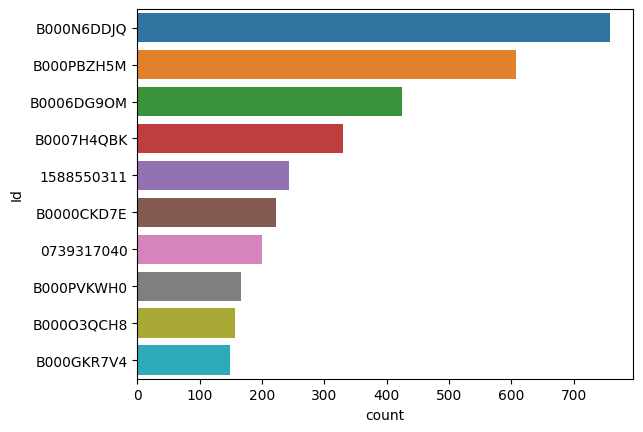

In [8]:
sns.barplot(y=id_count[:10:].index, x=id_count[:10:].values, orient='h')
plt.xlabel('count')
plt.ylabel('Id');

Возможно (точно) есть книги, которых нет в датасете книг, т.к. id тут больше, чем записей там. Видимо у каких то книг разные id, потому что id больше чем книг.

### Title

In [9]:
len(rating_data.Title.unique())

829

In [10]:
title_count = rating_data.Title.value_counts()
print(title_count)

The Scarlet Letter A Romance                                          758
Foundation                                                            607
Tess of the D'Urbervilles: A pure woman (Harper's modern classics)    424
Economics in one lesson                                               330
Romeo and Juliet                                                      243
                                                                     ... 
A Taste of Tuscany (Eyewitness Travel Guide)                            1
Crisis and faith                                                        1
Lewis Cass, (American statesmen)                                        1
White Rock Ways                                                         1
The Solar Home Book: Heating, Cooling and Designing With the Sun        1
Name: Title, Length: 829, dtype: int64


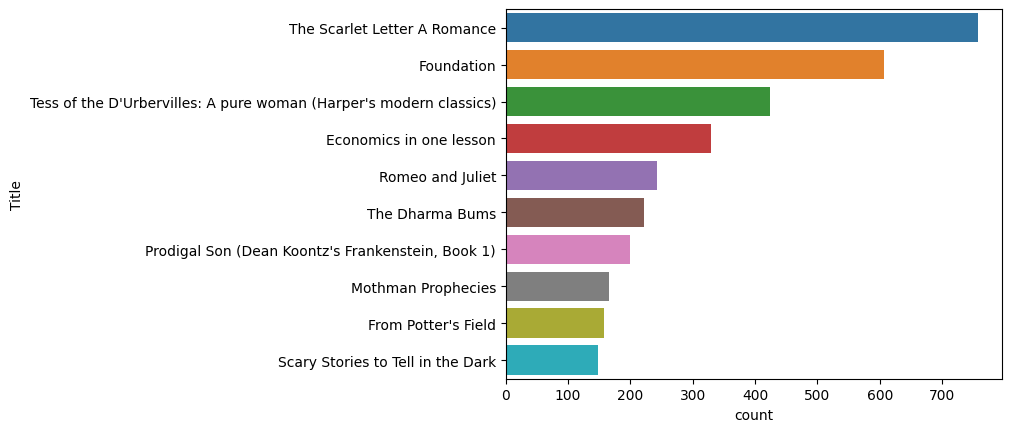

In [11]:
sns.barplot(y=title_count[:10:].index, x=title_count[:10:].values, orient='h')
plt.xlabel('count')
plt.ylabel('Title');

Видимо у каких то книг разные id, потому что id больше чем книг

### User_id

In [12]:
user_id_count = rating_data.User_id.value_counts()
print(user_id_count)

A1D2C0WDCSHUWZ    20
A14OJS0VWMOSWO    19
AFVQZQ8PW0L       15
A10B4UOL0IB274     7
AHD101501WCN1      7
                  ..
A2BJSJRHZW56H9     1
A2FIMO178UOES5     1
AADNCRC06WGTM      1
A1DBDSU4MLSCSQ     1
A2PEWRBLAMENWJ     1
Name: User_id, Length: 7562, dtype: int64


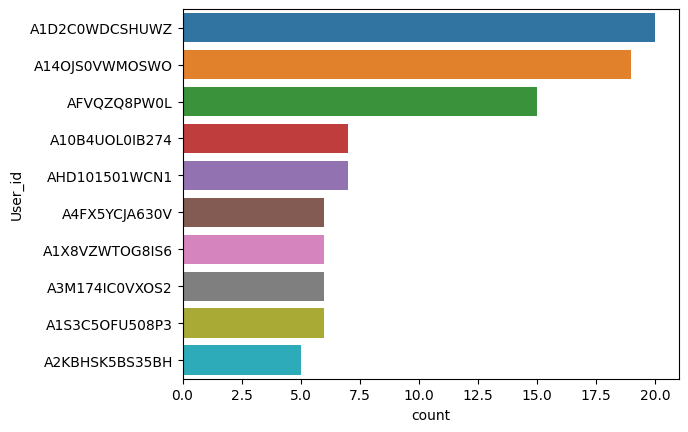

In [13]:
sns.barplot(y=user_id_count[:10:].index, x=user_id_count[:10:].values, orient='h')
plt.xlabel('count')
plt.ylabel('User_id');

### Profile_name

In [14]:
profile_name_count = rating_data.profileName.value_counts()
print(profile_name_count)

E. A Solinas "ea_solinas"     20
Midwest Book Review           20
A Customer                    18
Harriet Klausner              15
Avid Reader                   12
                              ..
tle7                           1
nomij "History Lover"          1
Debbie "debbiefb"              1
Chris (chrisbarnes@ac.net)     1
G'town mom                     1
Name: profileName, Length: 7394, dtype: int64


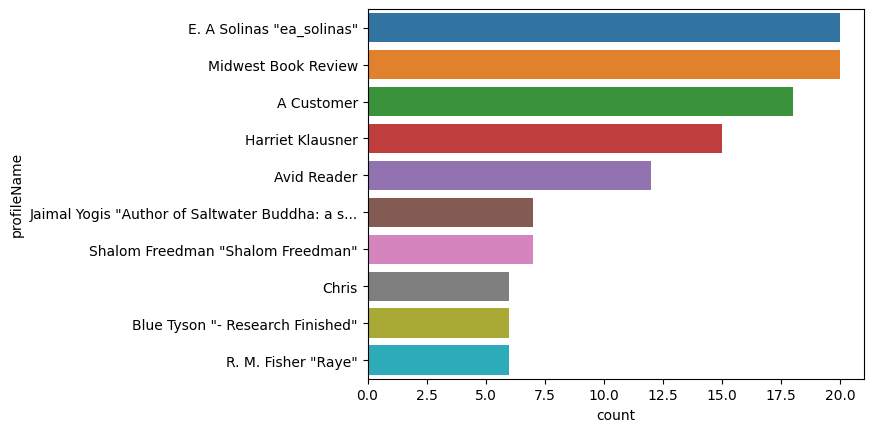

In [15]:
sns.barplot(y=profile_name_count[:10:].index, x=profile_name_count[:10:].values, orient='h')
plt.xlabel('count')
plt.ylabel('profileName');

### Helpfulnes

Заменили object с рациональной дробью на стобец с дробями типа float

На будущее: из стобца review/helpfulness сделать столбец со знаменателями

In [ ]:
def convert_to_fract(x):
    x = re.sub(r'\d+/0', '0', x)
    return float(Fraction(x))

rating_data['review/helpfulness'] = rating_data['review/helpfulness'].apply(lambda x: convert_to_fract(x))

In [14]:
rating_data.head(10)

Id                           Title  Price         User_id  \
0  1882931173  Its Only Art If Its Well Hung!    NaN   AVCGYZL8FQQTD   
1  0826414346        Dr. Seuss: American Icon    NaN  A30TK6U7DNS82R   
2  0826414346        Dr. Seuss: American Icon    NaN  A3UH4UZ4RSVO82   
3  0826414346        Dr. Seuss: American Icon    NaN  A2MVUWT453QH61   
4  0826414346        Dr. Seuss: American Icon    NaN  A22X4XUPKF66MR   
5  0826414346        Dr. Seuss: American Icon    NaN  A2F6NONFUDB6UK   
6  0826414346        Dr. Seuss: American Icon    NaN  A14OJS0VWMOSWO   
7  0826414346        Dr. Seuss: American Icon    NaN  A2RSSXTDZDUSH4   
8  0826414346        Dr. Seuss: American Icon    NaN  A25MD5I2GUIW6W   
9  0826414346        Dr. Seuss: American Icon    NaN  A3VA4XFS5WNJO3   

                          profileName  review/helpfulness  review/score  \
0               Jim of Oz "jim-of-oz"            1.000000           4.0   
1                       Kevin Killian            1.000000           5.0   
2                        John Granger            0.909091           5.0   
3  Roy E. Perry "amateur philosopher"            1.000000           4.0   
4     D. H. Richards "ninthwavestore"            1.000000           4.0   
5                              Malvin            1.000000           4.0   
6                 Midwest Book Review            0.750000           5.0   
7                           J. Squire            0.000000           5.0   
8           J. P. HIGBED "big fellow"            0.000000           5.0   
9                     Donald Burnside            0.600000           4.0   

   review/time                                     review/summary  \
0    940636800             Nice collection of Julie Strain images   
1   1095724800                                  Really Enjoyed It   
2   1078790400    Essential for every personal and Public Library   
3   1090713600    Phlip Nel gives silly Seuss a serious treatment   
4   1107993600                             Good academic overview   
5   1127174400         One of America's greatest creative talents   
6   1100131200  A memorably excellent survey of Dr. Seuss' man...   
7   1231200000                              Academia At It's Best   
8   1209859200           And to think that I read it on the tram!   
9   1076371200            Fascinating account of a genius at work   

                                         review/text  
0  This is only for Julie Strain fans. It's a col...  
1  I don't care much for Dr. Seuss but after read...  
2  If people become the books they read and if "t...  
3  Theodore Seuss Geisel (1904-1991), aka &quot;D...  
4  Philip Nel - Dr. Seuss: American IconThis is b...  
5  "Dr. Seuss: American Icon" by Philip Nel is a ...  
6  Theodor Seuss Giesel was best known as 'Dr. Se...  
7  When I recieved this book as a gift for Christ...  
8  Trams (or any public transport) are not usuall...  
9  As far as I am aware, this is the first book-l...

In [18]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                10000 non-null  int64  
 1   Id                        10000 non-null  object 
 2   Title                     10000 non-null  object 
 3   Price                     1414 non-null   float64
 4   User_id                   8117 non-null   object 
 5   profileName               8117 non-null   object 
 6   review/helpfulness        10000 non-null  float64
 7   review/score              10000 non-null  float64
 8   review/time               10000 non-null  object 
 9   review/summary            10000 non-null  object 
 10  review/text               10000 non-null  object 
 11  review/month              10000 non-null  int64  
 12  review/day                10000 non-null  int64  
 13  review/year               10000 non-null  int64  
 14  review/

Разобраться со шкалой.

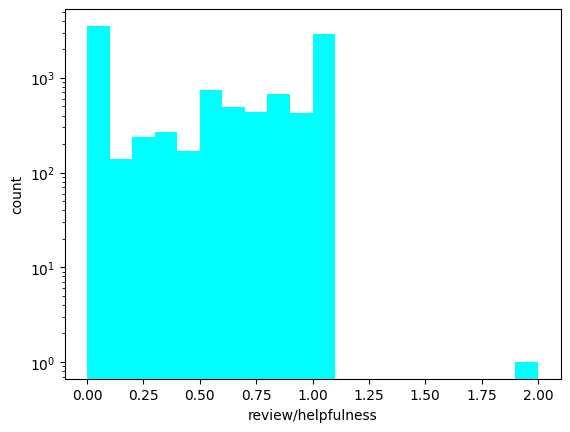

In [19]:
plt.hist(x=rating_data['review/helpfulness'], color='cyan', log=True, bins=20);
plt.xlabel('review/helpfulness')
plt.ylabel('count');

2 и 3 приравнивем к 1 (или возможно были перепутаны числитель со знаменателем)

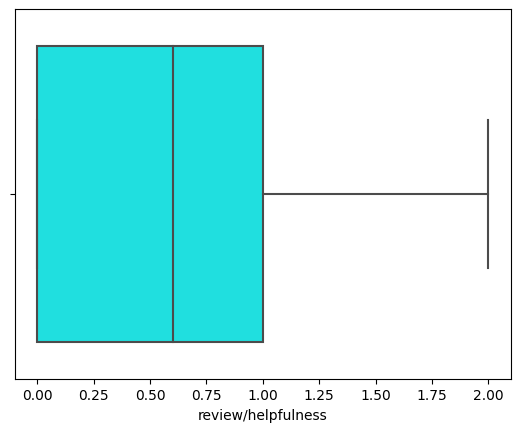

In [20]:
sns.boxplot(x=rating_data['review/helpfulness'], color='cyan');

## Score

In [21]:
score_count = rating_data['review/score'].value_counts()
print(score_count)

5.0    5774
4.0    2062
3.0     867
1.0     727
2.0     570
Name: review/score, dtype: int64


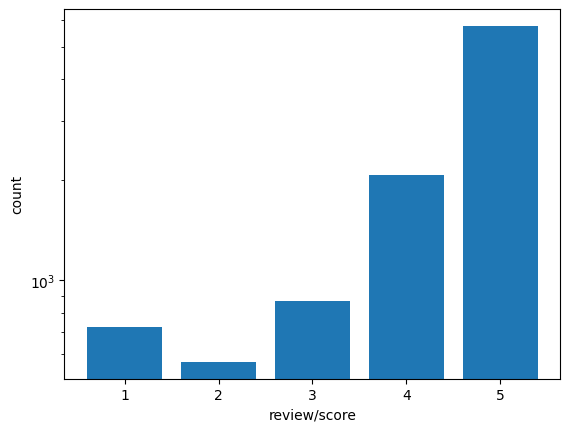

In [22]:
plt.bar(x=score_count.index, height=score_count.values, log=True);
plt.xlabel('review/score')
plt.ylabel('count');

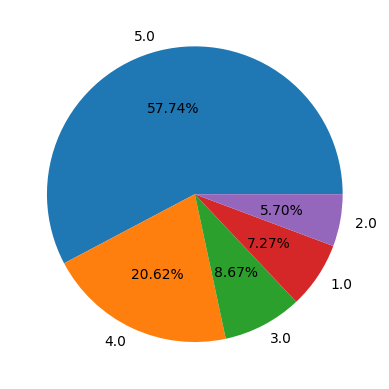

In [23]:
plt.pie(labels=score_count.index, x=score_count.values, autopct='%1.2f%%');

Классы не сбалансированны и хороших отзывов значительно больше остальных и следовательно для оценки классификаторов лучше использовать f-меру либо roc-auc

### Time

Данная колонка является меткой времени - кол-во секунд, отсчитанных от 1 января 1970 до даты отправки отзыва (в предобработке сделал замену - Leon)

In [21]:
from datetime import date

print(rating_data['review/time'][0])
print(date.fromtimestamp(rating_data['review/time'][0]))

940636800
1999-10-23


Выделить столбцы(месяц, число, год)

In [22]:
rating_data['review/time'] = rating_data['review/time'].apply(lambda x : date(1970,1, 1) if x == -1 else date.fromtimestamp(x))
rating_data['review/month'] = rating_data['review/time'].apply(lambda x : x.month)
rating_data['review/day'] = rating_data['review/time'].apply(lambda x : x.day)
rating_data['review/year'] = rating_data['review/time'].apply(lambda x : x.year)

Для конкретных дат подсчитать value_counts и вывести топ-10 (как в profileName). На диаграмму.

In [24]:
review_time_count = rating_data['review/time'].value_counts()
review_time_count

2012-09-06    17
2012-12-19    17
2013-01-11    15
2013-01-01    14
1998-08-23    13
              ..
2001-02-07     1
2007-11-20     1
2000-10-17     1
2010-07-29     1
2008-07-10     1
Name: review/time, Length: 4501, dtype: int64

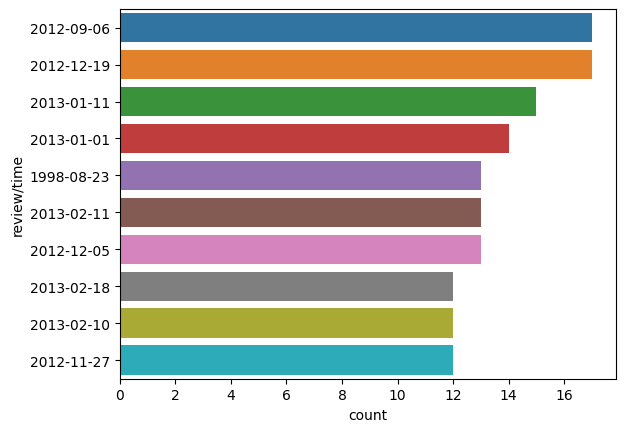

In [25]:
sns.barplot(y=review_time_count[:10:].index, x=review_time_count[:10:].values)
plt.ylabel('review/time')
plt.xlabel('count');

То же самое для года, посмотреть годы (unique)

In [26]:
review_year_count = rating_data['review/year'].value_counts()
review_year_count

2012    1079
2000     742
2001     726
1999     724
2002     657
2005     632
2009     591
2003     560
2006     551
2011     536
2010     528
1998     512
2008     504
2007     498
2004     480
2013     455
1997     185
1996      39
1995       1
Name: review/year, dtype: int64

In [27]:
len(rating_data['review/year'].unique())

19

Потом переделать на bar с логарифмической шкалой как в User_id

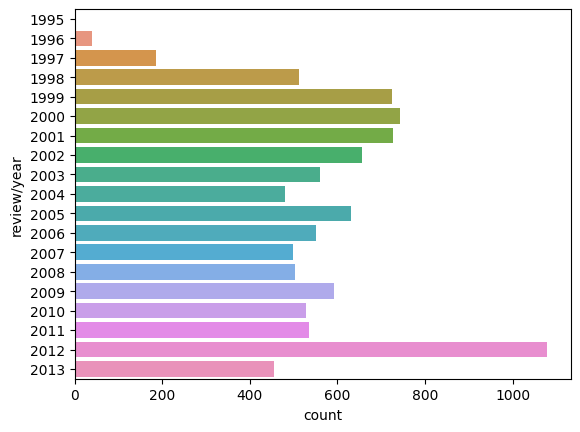

In [28]:
sns.barplot(y=review_year_count.index, x=review_year_count.values, orient='h')
plt.ylabel('review/year')
plt.xlabel('count');

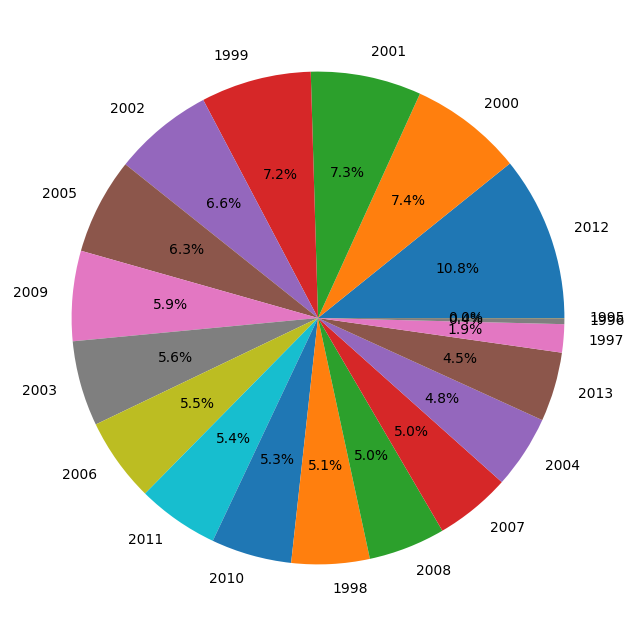

In [29]:
plt.figure(figsize=(8,8))
plt.pie(labels=review_year_count.index, x=review_year_count.values, autopct='%1.1f%%');

То же самой для месяца, только вывести всё на диаграмму.

In [30]:
review_month_count = rating_data['review/month'].value_counts()
review_month_count

1     1100
2      972
12     873
7      868
3      823
4      785
10     782
6      777
8      767
11     766
9      755
5      732
Name: review/month, dtype: int64

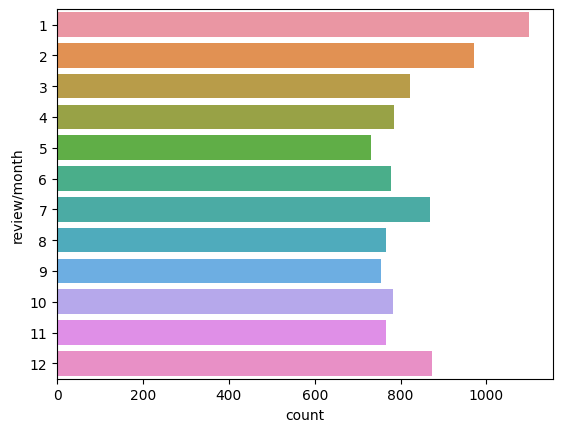

In [31]:
sns.barplot(y=review_month_count.index, x=review_month_count.values, orient='h')
plt.ylabel('review/month')
plt.xlabel('count');

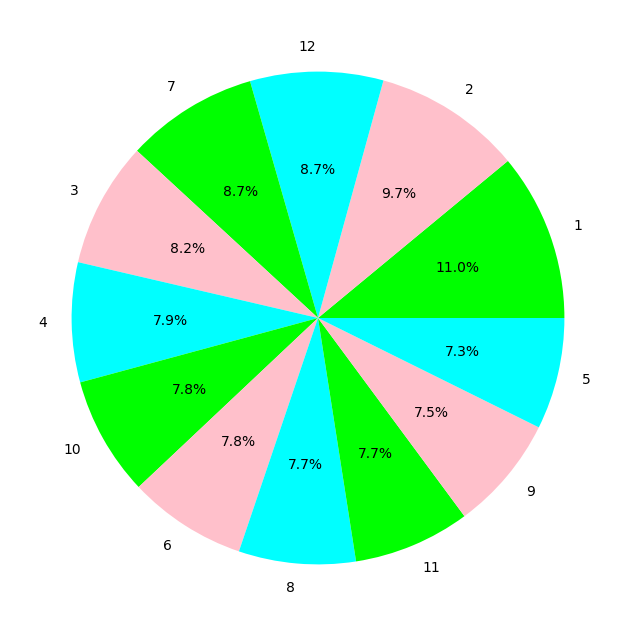

In [51]:
plt.figure(figsize=(8,8))
plt.pie(labels=review_month_count.index, x=review_month_count.values, autopct='%1.1f%%', colors=['lime', 'pink', 'cyan']);

То же самой для дня, только вывести всё на диаграмму.

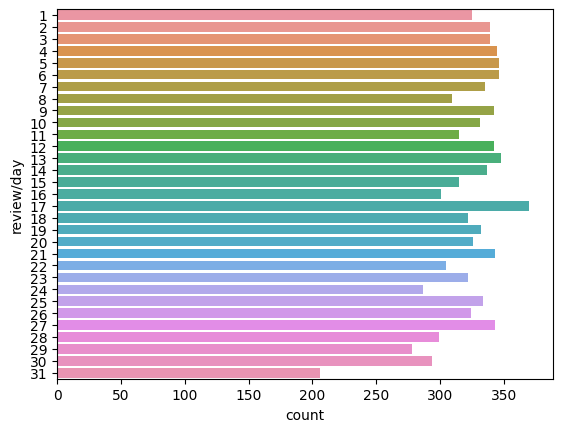

In [53]:
review_day_count = rating_data['review/day'].value_counts()
sns.barplot(y=review_day_count.index, x=review_day_count.values, orient='h')
plt.ylabel('review/day')
plt.xlabel('count');

### Summary

Доп колонка длина Summary в символах

In [33]:
s_array = rating_data['review/summary'].to_numpy().copy()
s_array

array(['Nice collection of Julie Strain images', 'Really Enjoyed It',
       'Essential for every personal and Public Library', ...,
       'Great pictures!', 'best book ever, picture or otherwise', 'kebin'],
      dtype=object)

In [34]:
for i in range(len(s_array)):
    s_array[i] = len(str(s_array[i]))
s_array

array([38, 17, 47, ..., 15, 36, 5], dtype=object)

In [50]:
rating_data['review/summary_char_len'] = s_array
rating_data.head(5)

Id                           Title  Price         User_id  \
0  1882931173  Its Only Art If Its Well Hung!    NaN   AVCGYZL8FQQTD   
1  0826414346        Dr. Seuss: American Icon    NaN  A30TK6U7DNS82R   
2  0826414346        Dr. Seuss: American Icon    NaN  A3UH4UZ4RSVO82   
3  0826414346        Dr. Seuss: American Icon    NaN  A2MVUWT453QH61   
4  0826414346        Dr. Seuss: American Icon    NaN  A22X4XUPKF66MR   

                          profileName  review/helpfulness  review/score  \
0               Jim of Oz "jim-of-oz"            1.000000           4.0   
1                       Kevin Killian            1.000000           5.0   
2                        John Granger            0.909091           5.0   
3  Roy E. Perry "amateur philosopher"            1.000000           4.0   
4     D. H. Richards "ninthwavestore"            1.000000           4.0   

  review/time                                   review/summary  \
0  1999-10-23           Nice collection of Julie Strain images   
1  2004-09-21                                Really Enjoyed It   
2  2004-03-09  Essential for every personal and Public Library   
3  2004-07-25  Phlip Nel gives silly Seuss a serious treatment   
4  2005-02-10                           Good academic overview   

                                         review/text  review/month  \
0  This is only for Julie Strain fans. It's a col...            10   
1  I don't care much for Dr. Seuss but after read...             9   
2  If people become the books they read and if "t...             3   
3  Theodore Seuss Geisel (1904-1991), aka &quot;D...             7   
4  Philip Nel - Dr. Seuss: American IconThis is b...             2   

   review/day  review/year review/summary_char_len  
0          23         1999                      38  
1          21         2004                      17  
2           9         2004                      47  
3          25         2004                      47  
4          10         2005                      22

Hist для нее

Увеличить размер фигуры, лог. ось(?)

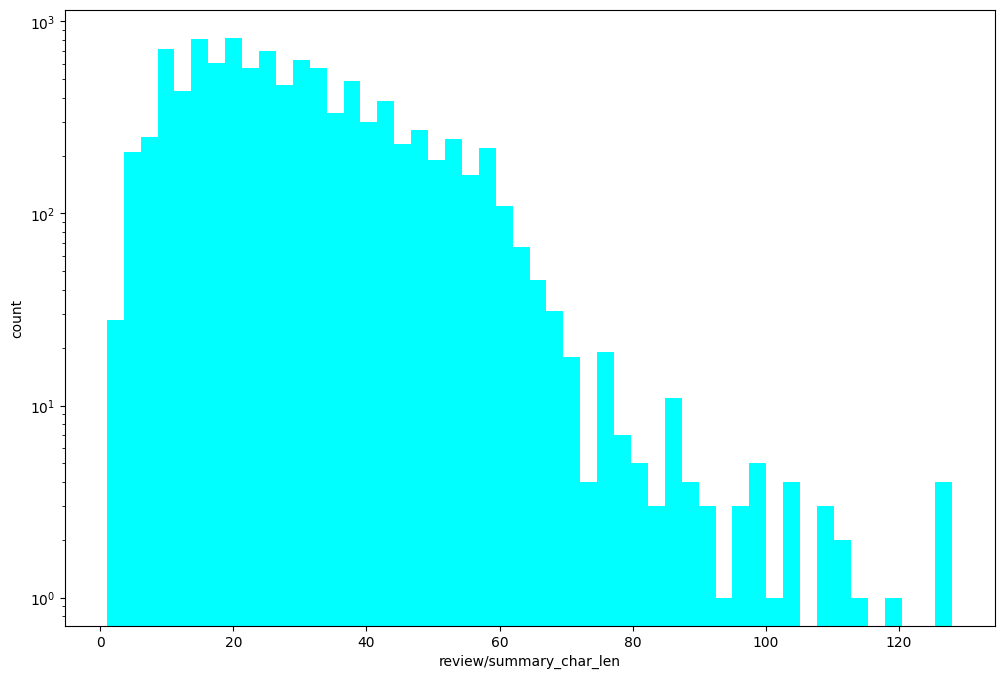

In [35]:
plt.figure(figsize=(12,8))
plt.hist(x=rating_data['review/summary_char_len'], color='cyan', log=True, bins=50);
plt.xlabel('review/summary_char_len')
plt.ylabel('count');

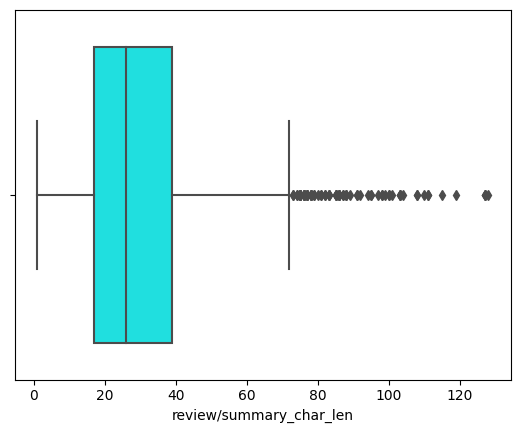

In [36]:
sns.boxplot(x=rating_data['review/summary_char_len'], color='cyan');

Доп колонка длина Summary в словах

In [53]:
words_array = rating_data['review/summary'].to_numpy().copy()
words_array

array(['Nice collection of Julie Strain images', 'Really Enjoyed It',
       'Essential for every personal and Public Library', ...,
       'Easier reads of those not well versed in historiography',
       'Yes, it is cheaper than the University Bookstore',
       "Collingwood's ideas sink in a quagmire or verbiage."],
      dtype=object)

In [54]:
for i in range(len(words_array)):
    words_array[i] = len(str(words_array[i]).split(' '))
words_array

array([6, 3, 7, ..., 9, 8, 8], dtype=object)

In [55]:
rating_data['review/summary_words_len'] = words_array
rating_data.head(5)

Id                           Title  Price         User_id  \
0  1882931173  Its Only Art If Its Well Hung!    NaN   AVCGYZL8FQQTD   
1  0826414346        Dr. Seuss: American Icon    NaN  A30TK6U7DNS82R   
2  0826414346        Dr. Seuss: American Icon    NaN  A3UH4UZ4RSVO82   
3  0826414346        Dr. Seuss: American Icon    NaN  A2MVUWT453QH61   
4  0826414346        Dr. Seuss: American Icon    NaN  A22X4XUPKF66MR   

                          profileName  review/helpfulness  review/score  \
0               Jim of Oz "jim-of-oz"            1.000000           4.0   
1                       Kevin Killian            1.000000           5.0   
2                        John Granger            0.909091           5.0   
3  Roy E. Perry "amateur philosopher"            1.000000           4.0   
4     D. H. Richards "ninthwavestore"            1.000000           4.0   

  review/time                                   review/summary  \
0  1999-10-23           Nice collection of Julie Strain images   
1  2004-09-21                                Really Enjoyed It   
2  2004-03-09  Essential for every personal and Public Library   
3  2004-07-25  Phlip Nel gives silly Seuss a serious treatment   
4  2005-02-10                           Good academic overview   

                                         review/text  review/month  \
0  This is only for Julie Strain fans. It's a col...            10   
1  I don't care much for Dr. Seuss but after read...             9   
2  If people become the books they read and if "t...             3   
3  Theodore Seuss Geisel (1904-1991), aka &quot;D...             7   
4  Philip Nel - Dr. Seuss: American IconThis is b...             2   

   review/day  review/year review/summary_char_len review/summary_words_len  
0          23         1999                      38                        6  
1          21         2004                      17                        3  
2           9         2004                      47                        7  
3          25         2004                      47                        8  
4          10         2005                      22                        3

hist и boxplot для нее

См. длину Summary в символах

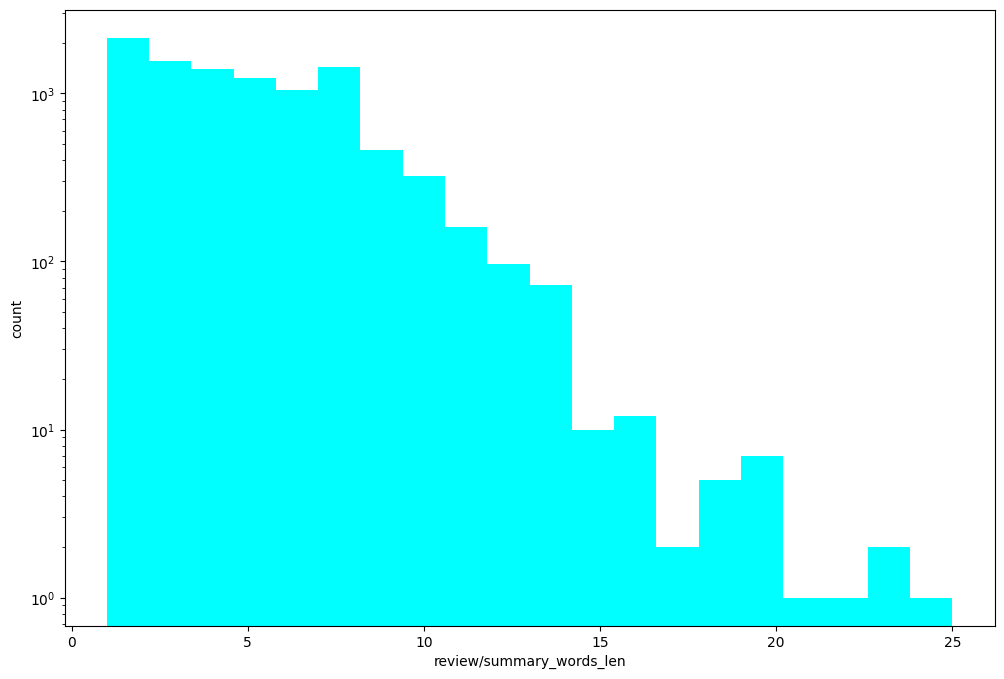

In [37]:
plt.figure(figsize=(12,8))
plt.hist(x=rating_data['review/summary_words_len'], color='cyan', log=True, bins=20);
plt.xlabel('review/summary_words_len')
plt.ylabel('count');

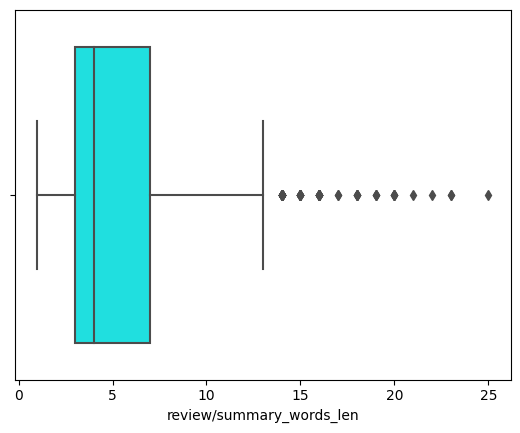

In [38]:
sns.boxplot(x=rating_data['review/summary_words_len'], color='cyan');

Wordcloud для самой колонки summary

Увеличить размер

(-0.5, 399.5, 199.5, -0.5)

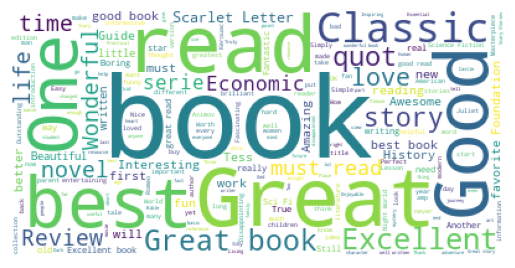

In [39]:
temp_array = rating_data['review/summary'].to_numpy().copy()
text_array = []

for i in range(len(temp_array)):
    if (len(str(temp_array[i])) > 0):
        text_array.append(str(temp_array[i]))

text = ' '.join(text_array)
cloud = WordCloud(background_color="white").generate(text)
plt.imshow(cloud)
plt.axis('off')

### Text

В символах

In [58]:
s_array = rating_data['review/text'].to_numpy().copy()
s_array

array(["This is only for Julie Strain fans. It's a collection of her photos -- about 80 pages worth with a nice section of paintings by Olivia.If you're looking for heavy literary content, this isn't the place to find it -- there's only about 2 pages with text and everything else is photos.Bottom line: if you only want one book, the Six Foot One ... is probably a better choice, however, if you like Julie like I like Julie, you won't go wrong on this one either.",
       "I don't care much for Dr. Seuss but after reading Philip Nel's book I changed my mind--that's a good testimonial to the power of Rel's writing and thinking. Rel plays Dr. Seuss the ultimate compliment of treating him as a serious poet as well as one of the 20th century's most interesting visual artists, and after reading his book I decided that a trip to the Mandeville Collections of the library at University of California in San Diego was in order, so I could visit some of the incredible Seuss/Geisel holdings they hav

In [59]:
for i in range(len(s_array)):
    s_array[i] = len(str(s_array[i]))
s_array

array([457, 1423, 1752, ..., 161, 258, 316], dtype=object)

In [60]:
rating_data['review/text_char_len'] = s_array
rating_data.head(5)

Id                           Title  Price         User_id  \
0  1882931173  Its Only Art If Its Well Hung!    NaN   AVCGYZL8FQQTD   
1  0826414346        Dr. Seuss: American Icon    NaN  A30TK6U7DNS82R   
2  0826414346        Dr. Seuss: American Icon    NaN  A3UH4UZ4RSVO82   
3  0826414346        Dr. Seuss: American Icon    NaN  A2MVUWT453QH61   
4  0826414346        Dr. Seuss: American Icon    NaN  A22X4XUPKF66MR   

                          profileName  review/helpfulness  review/score  \
0               Jim of Oz "jim-of-oz"            1.000000           4.0   
1                       Kevin Killian            1.000000           5.0   
2                        John Granger            0.909091           5.0   
3  Roy E. Perry "amateur philosopher"            1.000000           4.0   
4     D. H. Richards "ninthwavestore"            1.000000           4.0   

  review/time                                   review/summary  \
0  1999-10-23           Nice collection of Julie Strain images   
1  2004-09-21                                Really Enjoyed It   
2  2004-03-09  Essential for every personal and Public Library   
3  2004-07-25  Phlip Nel gives silly Seuss a serious treatment   
4  2005-02-10                           Good academic overview   

                                         review/text  review/month  \
0  This is only for Julie Strain fans. It's a col...            10   
1  I don't care much for Dr. Seuss but after read...             9   
2  If people become the books they read and if "t...             3   
3  Theodore Seuss Geisel (1904-1991), aka &quot;D...             7   
4  Philip Nel - Dr. Seuss: American IconThis is b...             2   

   review/day  review/year review/summary_char_len review/summary_words_len  \
0          23         1999                      38                        6   
1          21         2004                      17                        3   
2           9         2004                      47                        7   
3          25         2004                      47                        8   
4          10         2005                      22                        3   

  review/text_char_len  
0                  457  
1                 1423  
2                 1752  
3                 3662  
4                 1542

hist и boxplot для неё

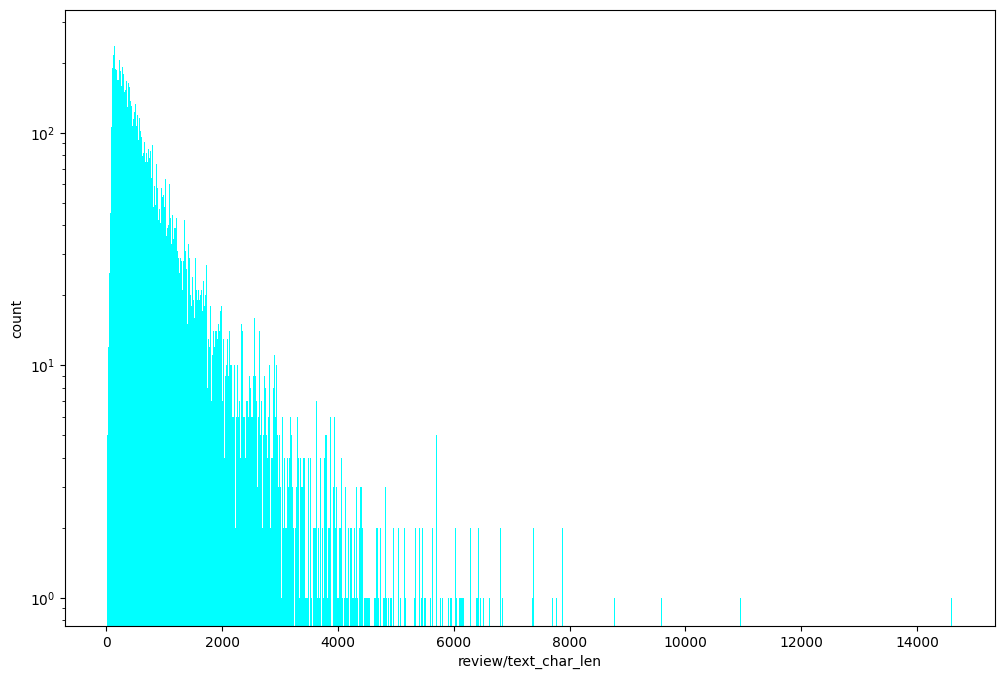

In [40]:
plt.figure(figsize=(12,8))
plt.hist(x=rating_data['review/text_char_len'], color='cyan', log=True, bins=1000);
plt.xlabel('review/text_char_len')
plt.ylabel('count');

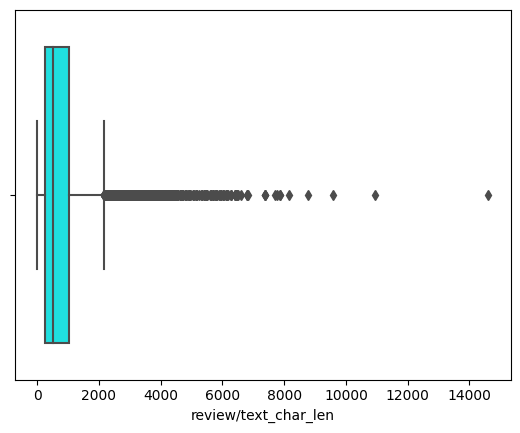

In [41]:
sns.boxplot(x=rating_data['review/text_char_len'], color='cyan');

В словах

In [62]:
words_array = rating_data['review/text'].to_numpy().copy()
words_array

array(["This is only for Julie Strain fans. It's a collection of her photos -- about 80 pages worth with a nice section of paintings by Olivia.If you're looking for heavy literary content, this isn't the place to find it -- there's only about 2 pages with text and everything else is photos.Bottom line: if you only want one book, the Six Foot One ... is probably a better choice, however, if you like Julie like I like Julie, you won't go wrong on this one either.",
       "I don't care much for Dr. Seuss but after reading Philip Nel's book I changed my mind--that's a good testimonial to the power of Rel's writing and thinking. Rel plays Dr. Seuss the ultimate compliment of treating him as a serious poet as well as one of the 20th century's most interesting visual artists, and after reading his book I decided that a trip to the Mandeville Collections of the library at University of California in San Diego was in order, so I could visit some of the incredible Seuss/Geisel holdings they hav

In [63]:
for i in range(len(words_array)):
    words_array[i] = len(str(words_array[i]).split(' '))
words_array

array([86, 252, 310, ..., 28, 47, 52], dtype=object)

In [64]:
rating_data['review/text_words_len'] = words_array
rating_data.head(5)

Id                           Title  Price         User_id  \
0  1882931173  Its Only Art If Its Well Hung!    NaN   AVCGYZL8FQQTD   
1  0826414346        Dr. Seuss: American Icon    NaN  A30TK6U7DNS82R   
2  0826414346        Dr. Seuss: American Icon    NaN  A3UH4UZ4RSVO82   
3  0826414346        Dr. Seuss: American Icon    NaN  A2MVUWT453QH61   
4  0826414346        Dr. Seuss: American Icon    NaN  A22X4XUPKF66MR   

                          profileName  review/helpfulness  review/score  \
0               Jim of Oz "jim-of-oz"            1.000000           4.0   
1                       Kevin Killian            1.000000           5.0   
2                        John Granger            0.909091           5.0   
3  Roy E. Perry "amateur philosopher"            1.000000           4.0   
4     D. H. Richards "ninthwavestore"            1.000000           4.0   

  review/time                                   review/summary  \
0  1999-10-23           Nice collection of Julie Strain images   
1  2004-09-21                                Really Enjoyed It   
2  2004-03-09  Essential for every personal and Public Library   
3  2004-07-25  Phlip Nel gives silly Seuss a serious treatment   
4  2005-02-10                           Good academic overview   

                                         review/text  review/month  \
0  This is only for Julie Strain fans. It's a col...            10   
1  I don't care much for Dr. Seuss but after read...             9   
2  If people become the books they read and if "t...             3   
3  Theodore Seuss Geisel (1904-1991), aka &quot;D...             7   
4  Philip Nel - Dr. Seuss: American IconThis is b...             2   

   review/day  review/year review/summary_char_len review/summary_words_len  \
0          23         1999                      38                        6   
1          21         2004                      17                        3   
2           9         2004                      47                        7   
3          25         2004                      47                        8   
4          10         2005                      22                        3   

  review/text_char_len review/text_words_len  
0                  457                    86  
1                 1423                   252  
2                 1752                   310  
3                 3662                   560  
4                 1542                   273

hist и boxplot для неё

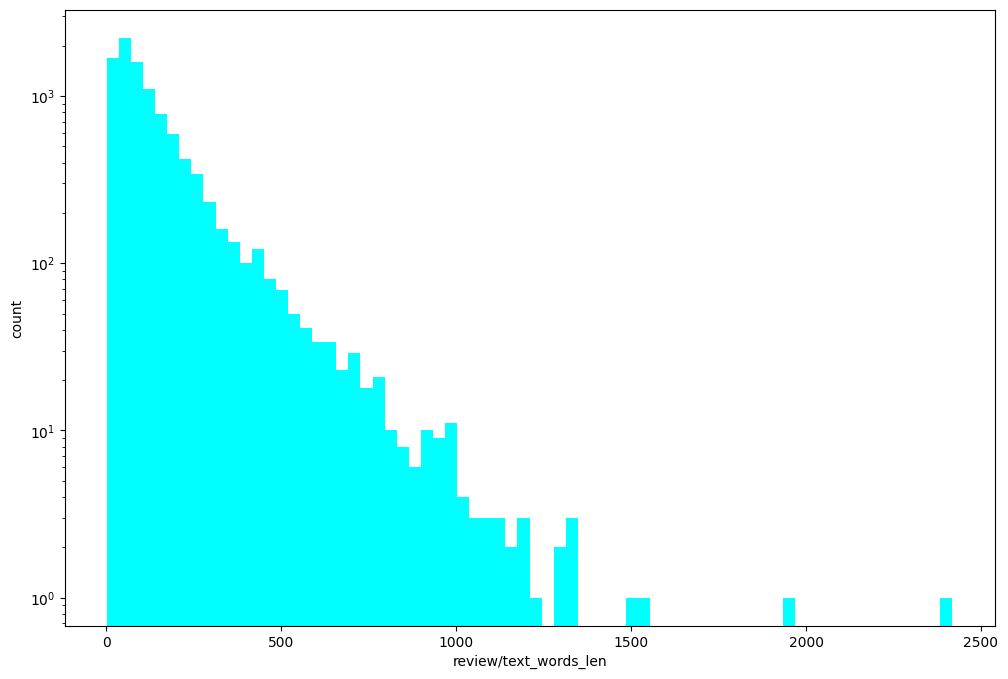

In [42]:
plt.figure(figsize=(12,8))
plt.hist(x=rating_data['review/text_words_len'], color='cyan', log=True, bins=70);
plt.xlabel('review/text_words_len')
plt.ylabel('count');

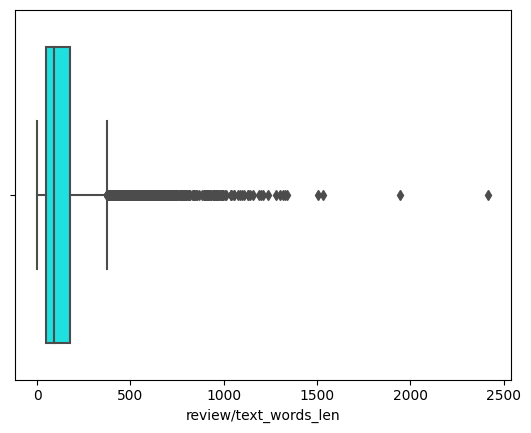

In [43]:
sns.boxplot(x=rating_data['review/text_words_len'], color='cyan');

Облако слов

(-0.5, 399.5, 199.5, -0.5)

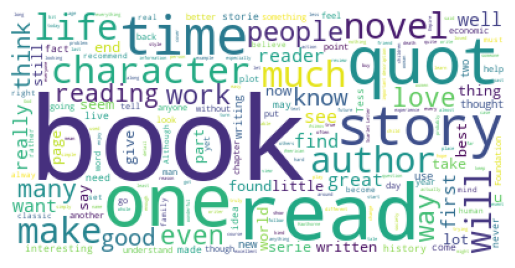

In [44]:
temp_array = rating_data['review/text'].to_numpy().copy()
text_array = []

for i in range(len(temp_array[:100000])):
    if (len(str(temp_array[i])) > 0):
        text_array.append(str(temp_array[i]))

text = ' '.join(text_array)
cloud = WordCloud(background_color="white").generate(text)
plt.imshow(cloud)
plt.axis('off')

### Сохранили новый DF

In [ ]:
rating_data.to_csv('Rating_data_with_additional.csv', index=False)

In [5]:
#rating_data = pd.read_csv('Rating_data_with_additional.csv')

## Исследование зависимостей

In [54]:
rating_data.columns

Index(['Unnamed: 0', 'Id', 'Title', 'Price', 'User_id', 'profileName',
       'review/helpfulness', 'review/score', 'review/time', 'review/summary',
       'review/text', 'review/month', 'review/day', 'review/year',
       'review/summary_char_len', 'review/summary_words_len',
       'review/text_char_len', 'review/text_words_len'],
      dtype='object')

In [55]:
num_cols_and_target = ['review/helpfulness', 'review/score', 'review/summary_char_len', 'review/summary_words_len', 
                        'review/text_char_len', 'review/text_words_len']

num_cols = ['review/helpfulness', 'review/summary_char_len', 'review/summary_words_len', 'review/text_char_len', 
            'review/text_words_len']

cat_cols_and_target = ['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/score', 'review/time', 'review/month', 
                        'review/day', 'review/year']

cat_cols = ['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/time', 'review/month', 'review/day', 'review/year']

text_cols = ['review/summary', 'review/text']


Сделали набор числовых колонок + целевая колонка

На будущее: подсчитать статистические характеристики

In [56]:
rating_data[num_cols]

review/helpfulness  review/summary_char_len  review/summary_words_len  \
0               1.000000                       38                         6   
1               1.000000                       17                         3   
2               0.909091                       47                         7   
3               1.000000                       47                         8   
4               1.000000                       22                         3   
...                  ...                      ...                       ...   
9995            0.000000                        9                         2   
9996            0.000000                       15                         3   
9997            0.000000                       15                         2   
9998            0.000000                       36                         6   
9999            1.000000                        5                         1   

      review/text_char_len  review/text_words_len  
0                      457                     86  
1                     1423                    252  
2                     1752                    310  
3                     3662                    560  
4                     1542                    273  
...                    ...                    ...  
9995                   501                     92  
9996                   346                     68  
9997                   398                     75  
9998                   274                     47  
9999                   224                     36  

[10000 rows x 5 columns]

In [58]:
corr_matrix = rating_data[num_cols].corr()

In [59]:
corr_matrix

review/helpfulness  review/summary_char_len  \
review/helpfulness                  1.000000                 0.168527   
review/summary_char_len             0.168527                 1.000000   
review/summary_words_len            0.139858                 0.918446   
review/text_char_len                0.251143                 0.235778   
review/text_words_len               0.249840                 0.230317   

                          review/summary_words_len  review/text_char_len  \
review/helpfulness                        0.139858              0.251143   
review/summary_char_len                   0.918446              0.235778   
review/summary_words_len                  1.000000              0.201325   
review/text_char_len                      0.201325              1.000000   
review/text_words_len                     0.200683              0.997162   

                          review/text_words_len  
review/helpfulness                     0.249840  
review/summary_char_len                0.230317  
review/summary_words_len               0.200683  
review/text_char_len                   0.997162  
review/text_words_len                  1.000000

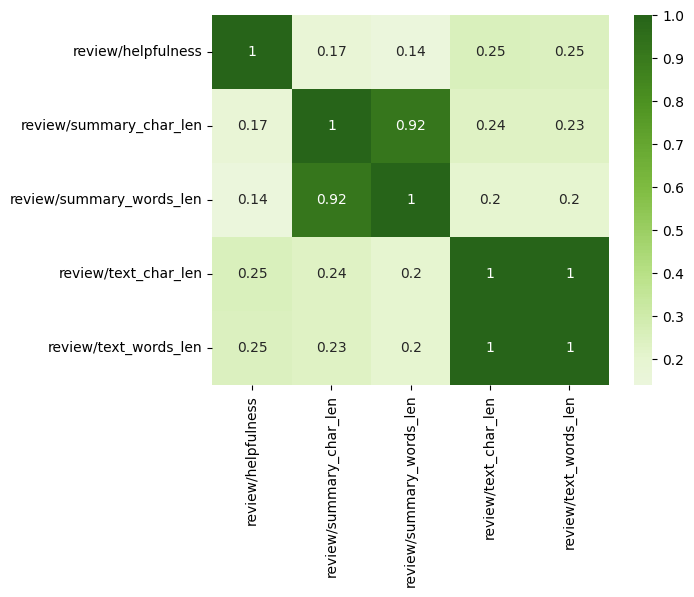

In [60]:
# plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, cmap="PiYG", annot=True, center=0);

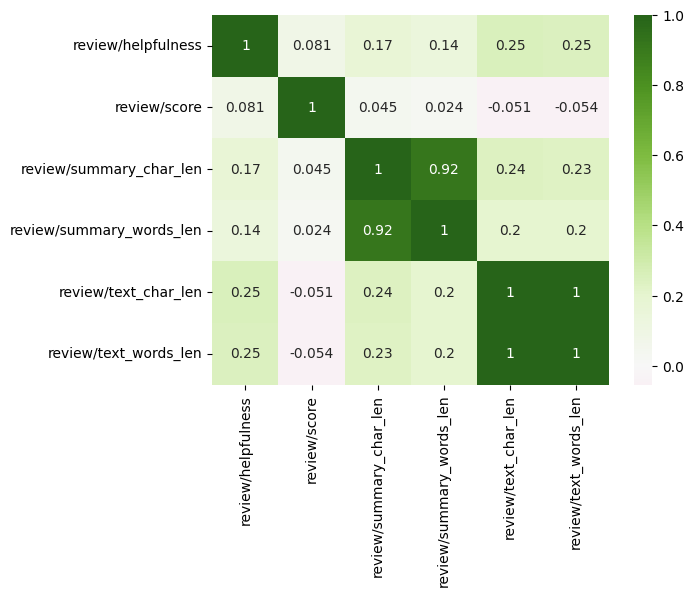

In [61]:
corr_matrix_num_target = pd.DataFrame.corr(rating_data[num_cols_and_target])
sns.heatmap(corr_matrix_num_target, cmap="PiYG", annot=True, center=0);

In [62]:
rating_data.columns

Index(['Unnamed: 0', 'Id', 'Title', 'Price', 'User_id', 'profileName',
       'review/helpfulness', 'review/score', 'review/time', 'review/summary',
       'review/text', 'review/month', 'review/day', 'review/year',
       'review/summary_char_len', 'review/summary_words_len',
       'review/text_char_len', 'review/text_words_len'],
      dtype='object')

### ID

In [97]:
top_10_id = id_count.index[:10:]
top_10_id 

Index(['B000N6DDJQ', 'B000PBZH5M', 'B0006DG9OM', 'B0007H4QBK', '1588550311',
       'B0000CKD7E', '0739317040', 'B000PVKWH0', 'B000O3QCH8', 'B000GKR7V4'],
      dtype='object')

In [99]:
rating_data['id_top_10'] = rating_data['Id'].apply(lambda x: x in top_10_id)
rating_data

/var/folders/6d/5jh66dcj5s1bkyqrkzk6j2hw0000gn/T/ipykernel_29523/1599322040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_data['id_top_10'] = rating_data['Id'].apply(lambda x: x in top_10_id)


Unnamed: 0          Id  \
0              0  1882931173   
1              1  0826414346   
2              2  0826414346   
3              3  0826414346   
4              4  0826414346   
...          ...         ...   
9995        9995  0714843016   
9996        9996  0714843016   
9997        9997  0714843016   
9998        9998  0714843016   
9999        9999  B000H573SU   

                                                  Title  Price  \
0                        Its Only Art If Its Well Hung!    NaN   
1                              Dr. Seuss: American Icon    NaN   
2                              Dr. Seuss: American Icon    NaN   
3                              Dr. Seuss: American Icon    NaN   
4                              Dr. Seuss: American Icon    NaN   
...                                                 ...    ...   
9995                                          Fish Face    NaN   
9996                                          Fish Face    NaN   
9997                                          Fish Face    NaN   
9998                                          Fish Face    NaN   
9999  The Solar Home Book: Heating, Cooling and Desi...    NaN   

             User_id                         profileName  review/helpfulness  \
0      AVCGYZL8FQQTD               Jim of Oz "jim-of-oz"            1.000000   
1     A30TK6U7DNS82R                       Kevin Killian            1.000000   
2     A3UH4UZ4RSVO82                        John Granger            0.909091   
3     A2MVUWT453QH61  Roy E. Perry "amateur philosopher"            1.000000   
4     A22X4XUPKF66MR     D. H. Richards "ninthwavestore"            1.000000   
...              ...                                 ...                 ...   
9995   AKI17M38FBHO3                      Mary Ann Payne            0.000000   
9996  A23RC1806MU14U         Jay E. Schwartz "livediver"            0.000000   
9997  A1T38WUVN5DHOW                         A. Gorozdos            0.000000   
9998  A3KPR36IFBPAPE                          G'town mom            0.000000   
9999  A2PEWRBLAMENWJ                                 Ron            1.000000   

      review/score review/time  \
0              4.0  1999-10-23   
1              5.0  2004-09-21   
2              5.0  2004-03-09   
3              4.0  2004-07-25   
4              4.0  2005-02-10   
...            ...         ...   
9995           5.0  2009-09-24   
9996           5.0  2008-07-10   
9997           3.0  2007-06-10   
9998           5.0  2007-01-09   
9999           5.0  2006-10-04   

                                       review/summary  \
0              Nice collection of Julie Strain images   
1                                   Really Enjoyed It   
2     Essential for every personal and Public Library   
3     Phlip Nel gives silly Seuss a serious treatment   
4                              Good academic overview   
...                                               ...   
9995                                        fish face   
9996                                  fish book faces   
9997                                  Great pictures!   
9998             best book ever, picture or otherwise   
9999                                            kebin   

                                            review/text  review/month  \
0     This is only for Julie Strain fans. It's a col...            10   
1     I don't care much for Dr. Seuss but after read...             9   
2     If people become the books they read and if "t...             3   
3     Theodore Seuss Geisel (1904-1991), aka &quot;D...             7   
4     Philip Nel - Dr. Seuss: American IconThis is b...             2   
...                                                 ...           ...   
9995  Many books I buy are to keep my gradeschool gr...             9   
9996  awesome pics beleive it there int he sea we kn...             7   
9997  This book has wonderful pictures but I think i...             6   
9998  we bought this book first at the mont

In [100]:
rating_data_top_10_id_only = rating_data[rating_data['id_top_10'] == True]
rating_data_top_10_id_only

Unnamed: 0          Id                Title  Price         User_id  \
1020        1020  B000O3QCH8  From Potter's Field    NaN             NaN   
1021        1021  B000O3QCH8  From Potter's Field    NaN             NaN   
1022        1022  B000O3QCH8  From Potter's Field    NaN             NaN   
1023        1023  B000O3QCH8  From Potter's Field    NaN             NaN   
1024        1024  B000O3QCH8  From Potter's Field    NaN             NaN   
...          ...         ...                  ...    ...             ...   
9236        9236  1588550311     Romeo and Juliet    NaN   AWXNYZ3B8LZ2C   
9237        9237  1588550311     Romeo and Juliet    NaN  A1VBA2XQ6L39NK   
9238        9238  1588550311     Romeo and Juliet    NaN   AMJ1XEIIWI8P1   
9239        9239  1588550311     Romeo and Juliet    NaN  A2ECJXZUG7JKHP   
9240        9240  1588550311     Romeo and Juliet    NaN   AGCTRJ44CP2DE   

                profileName  review/helpfulness  review/score review/time  \
1020                    NaN                 0.0           5.0  1997-11-02   
1021                    NaN                 0.0           5.0  1997-07-24   
1022                    NaN                 0.0           5.0  1997-04-20   
1023                    NaN                 0.0           5.0  1997-04-11   
1024                    NaN                 0.0           2.0  1997-03-26   
...                     ...                 ...           ...         ...   
9236  Gregory Chase Sherrer                 0.0           5.0  2013-02-12   
9237         Emily Bosworth                 0.0           5.0  2013-02-09   
9238       Jessica D. Plunk                 0.0           5.0  2013-02-09   
9239          Phil Burstall                 0.0           5.0  2013-02-04   
9240    Megan Orme-Whitlock                 0.0           4.0  2013-02-01   

                                     review/summary  \
1020              WOW A REAL KNOCKOUT!!!!!!!! GREAT   
1021  Kudos for Kay...I finally saw her human side!   
1022                                   I'm hooked!!   
1023                        ONE OF HER BEST BOOKS!!   
1024     Unsatisfying ending disappoints the reader   
...                                             ...   
9236                                     Great book   
9237                                 just as shown!   
9238                                 Students enjoy   
9239                                    Shakespeare   
9240                  Love Shakespeare on my Kindle   

                                            review/text  review/month  \
1020  I must confess this is my first PW and i liked...            11   
1021  Patricia Cornwell has finally added that eleme...             7   
1022  I've just started reading her books. They are ...             4   
1023  I never wanted this book to end. One of the mo...             4   
1024  The plot develops nicely then ends abruptly wi...             3   
...                                                 ...           ...   
9236  This book not only a classic but a real journe...             2   
9237  great condition and extremely cheap. comes wit...             2   
9238  My students enjoy listening to the scenes, and...             2   
9239  This is a remembrance of things past and love ...             2   
9240  Until I reread it, this year, I had forgotten ...             2   

      review/day  review/year  review/summary_char_len  \
1020           2         1997                       33   
1021          24         1997                       45   
1022          20         1997                       12   
1023          11         1997                       23   
1024          26         1997                       42   
...          ...          ...                      ...   
9236          12         2013                       10   
9237           9         2013                       14   
9238           9         2013                       14   
9239           4         2013                     

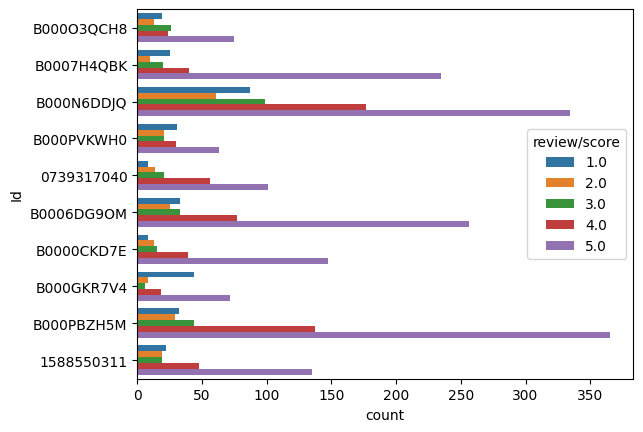

In [102]:
sns.countplot(data=rating_data_top_10_id_only, y='Id', hue='review/score', orient='h');

### Title

In [103]:
top_10_title = title_count.index[:10:]
top_10_title 

Index(['The Scarlet Letter A Romance', 'Foundation',
       'Tess of the D'Urbervilles: A pure woman (Harper's modern classics)',
       'Economics in one lesson', 'Romeo and Juliet', 'The Dharma Bums',
       'Prodigal Son (Dean Koontz's Frankenstein, Book 1)',
       'Mothman Prophecies', 'From Potter's Field',
       'Scary Stories to Tell in the Dark'],
      dtype='object')

In [104]:
rating_data['title_top_10'] = rating_data['Title'].apply(lambda x: x in top_10_title)
rating_data

/var/folders/6d/5jh66dcj5s1bkyqrkzk6j2hw0000gn/T/ipykernel_29523/3423446136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_data['title_top_10'] = rating_data['Title'].apply(lambda x: x in top_10_title)


Unnamed: 0          Id  \
0              0  1882931173   
1              1  0826414346   
2              2  0826414346   
3              3  0826414346   
4              4  0826414346   
...          ...         ...   
9995        9995  0714843016   
9996        9996  0714843016   
9997        9997  0714843016   
9998        9998  0714843016   
9999        9999  B000H573SU   

                                                  Title  Price  \
0                        Its Only Art If Its Well Hung!    NaN   
1                              Dr. Seuss: American Icon    NaN   
2                              Dr. Seuss: American Icon    NaN   
3                              Dr. Seuss: American Icon    NaN   
4                              Dr. Seuss: American Icon    NaN   
...                                                 ...    ...   
9995                                          Fish Face    NaN   
9996                                          Fish Face    NaN   
9997                                          Fish Face    NaN   
9998                                          Fish Face    NaN   
9999  The Solar Home Book: Heating, Cooling and Desi...    NaN   

             User_id                         profileName  review/helpfulness  \
0      AVCGYZL8FQQTD               Jim of Oz "jim-of-oz"            1.000000   
1     A30TK6U7DNS82R                       Kevin Killian            1.000000   
2     A3UH4UZ4RSVO82                        John Granger            0.909091   
3     A2MVUWT453QH61  Roy E. Perry "amateur philosopher"            1.000000   
4     A22X4XUPKF66MR     D. H. Richards "ninthwavestore"            1.000000   
...              ...                                 ...                 ...   
9995   AKI17M38FBHO3                      Mary Ann Payne            0.000000   
9996  A23RC1806MU14U         Jay E. Schwartz "livediver"            0.000000   
9997  A1T38WUVN5DHOW                         A. Gorozdos            0.000000   
9998  A3KPR36IFBPAPE                          G'town mom            0.000000   
9999  A2PEWRBLAMENWJ                                 Ron            1.000000   

      review/score review/time  \
0              4.0  1999-10-23   
1              5.0  2004-09-21   
2              5.0  2004-03-09   
3              4.0  2004-07-25   
4              4.0  2005-02-10   
...            ...         ...   
9995           5.0  2009-09-24   
9996           5.0  2008-07-10   
9997           3.0  2007-06-10   
9998           5.0  2007-01-09   
9999           5.0  2006-10-04   

                                       review/summary  ... review/month  \
0              Nice collection of Julie Strain images  ...           10   
1                                   Really Enjoyed It  ...            9   
2     Essential for every personal and Public Library  ...            3   
3     Phlip Nel gives silly Seuss a serious treatment  ...            7   
4                              Good academic overview  ...            2   
...                                               ...  ...          ...   
9995                                        fish face  ...            9   
9996                                  fish book faces  ...            7   
9997                                  Great pictures!  ...            6   
9998             best book ever, picture or otherwise  ...            1   
9999                                            kebin  ...           10   

      review/day  review/year  review/summary_char_len  \
0             23         1999                       38   
1             21         2004                       17   
2              9         2004                       47   
3             25         2004                       47   
4             10         2005                       22   
...          ...          ...                      ...   
9995          24         2009                        9   
9996          10         2008                       15   
9997          10         2007      

In [105]:
rating_data_top_10_title_only = rating_data[rating_data['title_top_10'] == True]
rating_data_top_10_title_only

Unnamed: 0          Id                Title  Price         User_id  \
1020        1020  B000O3QCH8  From Potter's Field    NaN             NaN   
1021        1021  B000O3QCH8  From Potter's Field    NaN             NaN   
1022        1022  B000O3QCH8  From Potter's Field    NaN             NaN   
1023        1023  B000O3QCH8  From Potter's Field    NaN             NaN   
1024        1024  B000O3QCH8  From Potter's Field    NaN             NaN   
...          ...         ...                  ...    ...             ...   
9236        9236  1588550311     Romeo and Juliet    NaN   AWXNYZ3B8LZ2C   
9237        9237  1588550311     Romeo and Juliet    NaN  A1VBA2XQ6L39NK   
9238        9238  1588550311     Romeo and Juliet    NaN   AMJ1XEIIWI8P1   
9239        9239  1588550311     Romeo and Juliet    NaN  A2ECJXZUG7JKHP   
9240        9240  1588550311     Romeo and Juliet    NaN   AGCTRJ44CP2DE   

                profileName  review/helpfulness  review/score review/time  \
1020                    NaN                 0.0           5.0  1997-11-02   
1021                    NaN                 0.0           5.0  1997-07-24   
1022                    NaN                 0.0           5.0  1997-04-20   
1023                    NaN                 0.0           5.0  1997-04-11   
1024                    NaN                 0.0           2.0  1997-03-26   
...                     ...                 ...           ...         ...   
9236  Gregory Chase Sherrer                 0.0           5.0  2013-02-12   
9237         Emily Bosworth                 0.0           5.0  2013-02-09   
9238       Jessica D. Plunk                 0.0           5.0  2013-02-09   
9239          Phil Burstall                 0.0           5.0  2013-02-04   
9240    Megan Orme-Whitlock                 0.0           4.0  2013-02-01   

                                     review/summary  ... review/month  \
1020              WOW A REAL KNOCKOUT!!!!!!!! GREAT  ...           11   
1021  Kudos for Kay...I finally saw her human side!  ...            7   
1022                                   I'm hooked!!  ...            4   
1023                        ONE OF HER BEST BOOKS!!  ...            4   
1024     Unsatisfying ending disappoints the reader  ...            3   
...                                             ...  ...          ...   
9236                                     Great book  ...            2   
9237                                 just as shown!  ...            2   
9238                                 Students enjoy  ...            2   
9239                                    Shakespeare  ...            2   
9240                  Love Shakespeare on my Kindle  ...            2   

      review/day  review/year  review/summary_char_len  \
1020           2         1997                       33   
1021          24         1997                       45   
1022          20         1997                       12   
1023          11         1997                       23   
1024          26         1997                       42   
...          ...          ...                      ...   
9236          12         2013                       10   
9237           9         2013                       14   
9238           9         2013                       14   
9239           4         2013                       11   
9240           1         2013                       29   

      review/summary_words_len  review/text_char_len  review/text_words_len  \
1020                         5                   294                     58   
1021                         8                   867                    158   
1022                         2                   317                     55   
1023                         5                   135                     28   
1024                         5                   634                    102   
...                        ...                   ...                    ...   
9236                         2           

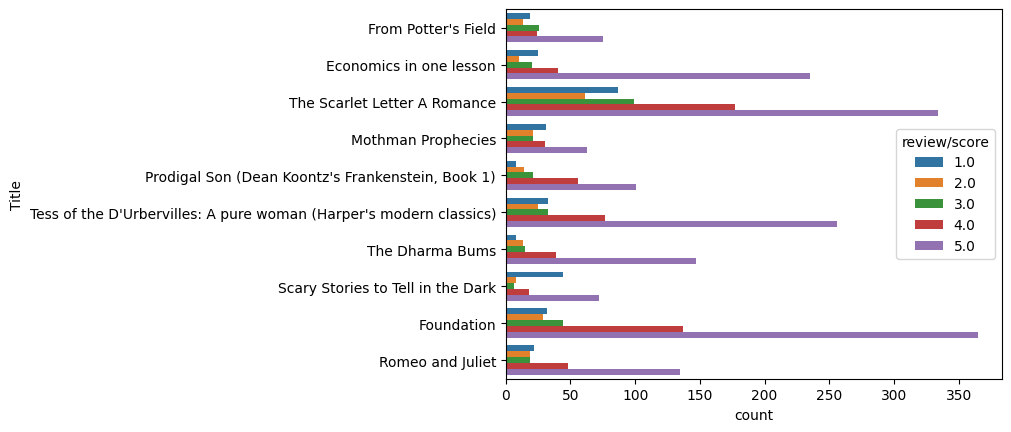

In [106]:
sns.countplot(data=rating_data_top_10_title_only, y='Title', hue='review/score', orient='h');

### User_id

In [107]:
top_10_user_id = user_id_count.index[:10:]
top_10_user_id 

Index(['A1D2C0WDCSHUWZ', 'A14OJS0VWMOSWO', 'AFVQZQ8PW0L', 'A10B4UOL0IB274',
       'AHD101501WCN1', 'A4FX5YCJA630V', 'A1X8VZWTOG8IS6', 'A3M174IC0VXOS2',
       'A1S3C5OFU508P3', 'A2KBHSK5BS35BH'],
      dtype='object')

In [108]:
rating_data['user_id_top_10'] = rating_data['User_id'].apply(lambda x: x in top_10_user_id)
rating_data

/var/folders/6d/5jh66dcj5s1bkyqrkzk6j2hw0000gn/T/ipykernel_29523/1871497156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_data['user_id_top_10'] = rating_data['User_id'].apply(lambda x: x in top_10_user_id)


Unnamed: 0          Id  \
0              0  1882931173   
1              1  0826414346   
2              2  0826414346   
3              3  0826414346   
4              4  0826414346   
...          ...         ...   
9995        9995  0714843016   
9996        9996  0714843016   
9997        9997  0714843016   
9998        9998  0714843016   
9999        9999  B000H573SU   

                                                  Title  Price  \
0                        Its Only Art If Its Well Hung!    NaN   
1                              Dr. Seuss: American Icon    NaN   
2                              Dr. Seuss: American Icon    NaN   
3                              Dr. Seuss: American Icon    NaN   
4                              Dr. Seuss: American Icon    NaN   
...                                                 ...    ...   
9995                                          Fish Face    NaN   
9996                                          Fish Face    NaN   
9997                                          Fish Face    NaN   
9998                                          Fish Face    NaN   
9999  The Solar Home Book: Heating, Cooling and Desi...    NaN   

             User_id                         profileName  review/helpfulness  \
0      AVCGYZL8FQQTD               Jim of Oz "jim-of-oz"            1.000000   
1     A30TK6U7DNS82R                       Kevin Killian            1.000000   
2     A3UH4UZ4RSVO82                        John Granger            0.909091   
3     A2MVUWT453QH61  Roy E. Perry "amateur philosopher"            1.000000   
4     A22X4XUPKF66MR     D. H. Richards "ninthwavestore"            1.000000   
...              ...                                 ...                 ...   
9995   AKI17M38FBHO3                      Mary Ann Payne            0.000000   
9996  A23RC1806MU14U         Jay E. Schwartz "livediver"            0.000000   
9997  A1T38WUVN5DHOW                         A. Gorozdos            0.000000   
9998  A3KPR36IFBPAPE                          G'town mom            0.000000   
9999  A2PEWRBLAMENWJ                                 Ron            1.000000   

      review/score review/time  \
0              4.0  1999-10-23   
1              5.0  2004-09-21   
2              5.0  2004-03-09   
3              4.0  2004-07-25   
4              4.0  2005-02-10   
...            ...         ...   
9995           5.0  2009-09-24   
9996           5.0  2008-07-10   
9997           3.0  2007-06-10   
9998           5.0  2007-01-09   
9999           5.0  2006-10-04   

                                       review/summary  ... review/day  \
0              Nice collection of Julie Strain images  ...         23   
1                                   Really Enjoyed It  ...         21   
2     Essential for every personal and Public Library  ...          9   
3     Phlip Nel gives silly Seuss a serious treatment  ...         25   
4                              Good academic overview  ...         10   
...                                               ...  ...        ...   
9995                                        fish face  ...         24   
9996                                  fish book faces  ...         10   
9997                                  Great pictures!  ...         10   
9998             best book ever, picture or otherwise  ...          9   
9999                                            kebin  ...          4   

      review/year  review/summary_char_len  review/summary_words_len  \
0            1999                       38                         6   
1            2004                       17                         3   
2            2004                       47                         7   
3            2004                       47                         8   
4            2005                       22                         3   
...           ...                      ...                       ...   
9995         2009                        9                         2   
9996 

In [109]:
rating_data_top_10_user_id_only = rating_data[rating_data['user_id_top_10'] == True]
rating_data_top_10_user_id_only

Unnamed: 0          Id  \
6              6  0826414346   
176          176  1884734766   
342          342  B000FZEKVA   
385          385  B000H45MXO   
413          413  0671551345   
...          ...         ...   
9255        9255  0688165648   
9278        9278  1890460087   
9280        9280  0312283989   
9652        9652  B000KWDVVI   
9708        9708  B000KWDVVI   

                                                  Title  Price  \
6                              Dr. Seuss: American Icon    NaN   
176   Dealing With Disappointment: Helping Kids Cope...  21.95   
342   Communicating with Orcas - The Whales' Perspec...   4.30   
385   THE SECULAR CITY -SECULARIZATION AND URBANIZAT...    NaN   
413                  Night World: Daughters Of Darkness    NaN   
...                                                 ...    ...   
9255                Unholy Order: A Paul Devlin Mystery    NaN   
9278  Different Brains, Different Learners: How to R...    NaN   
9280             East of the Arch: A Joe Keough Mystery    NaN   
9652                                        Pushing Ice    NaN   
9708                                        Pushing Ice    NaN   

             User_id                        profileName  review/helpfulness  \
6     A14OJS0VWMOSWO                Midwest Book Review            0.750000   
176   A14OJS0VWMOSWO                Midwest Book Review            0.941176   
342   A14OJS0VWMOSWO                Midwest Book Review            1.000000   
385    AHD101501WCN1  Shalom Freedman "Shalom Freedman"            1.000000   
413   A2KBHSK5BS35BH                    Leeanna Chetsko            0.000000   
...              ...                                ...                 ...   
9255     AFVQZQ8PW0L                   Harriet Klausner            1.000000   
9278  A14OJS0VWMOSWO                Midwest Book Review            1.000000   
9280     AFVQZQ8PW0L                   Harriet Klausner            1.000000   
9652  A14OJS0VWMOSWO                Midwest Book Review            0.000000   
9708  A1X8VZWTOG8IS6   Blue Tyson "- Research Finished"            0.000000   

      review/score review/time  \
6              5.0  2004-11-11   
176            5.0  2004-04-13   
342            5.0  2006-10-15   
385            5.0  2006-08-29   
413            1.0  2009-12-13   
...            ...         ...   
9255           5.0  2002-02-04   
9278           5.0  2010-02-15   
9280           5.0  2002-10-09   
9652           5.0  2006-12-14   
9708           4.0  2007-09-02   

                                         review/summary  ... review/day  \
6     A memorably excellent survey of Dr. Seuss' man...  ...         11   
176   Filled from cover to cover with practical guid...  ...         13   
342                      Makes for fascinating reading.  ...         15   
385   A profound if somewhat exaggerated analysis of...  ...         29   
413                Night World 2: Daughters of Darkness  ...         13   
...                                                 ...  ...        ...   
9255                      fascinating police procedural  ...          4   
9278  A survey updated to reflect new tools and stra...  ...         15   
9280                        excellent police procedural  ...          9   
9652  Swift action and intrigue marks a story with m...  ...         14   
9708                                 Not Free SF Reader  ...          2   

      review/year  review/summary_char_len  review/summary_words_len  \
6            2004                       60                         9   
176          2004                       50                         8   
342          2006                       30                         4   
385          2006                       70                         9   
413          2009                       36                         6   
...           ...                      ...                       ...   
9255         2002                       29                       

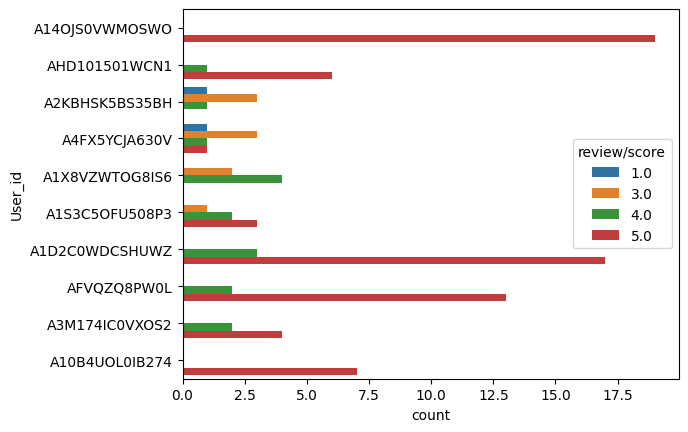

In [111]:
sns.countplot(data=rating_data_top_10_user_id_only, y='User_id', hue='review/score', orient='h');

### profileName

In [112]:
top_10_profile_name = profile_name_count.index[:10:]
top_10_profile_name 

Index(['E. A Solinas "ea_solinas"', 'Midwest Book Review', 'A Customer',
       'Harriet Klausner', 'Avid Reader',
       'Jaimal Yogis "Author of Saltwater Buddha: a s...',
       'Shalom Freedman "Shalom Freedman"', 'Chris',
       'Blue Tyson "- Research Finished"', 'R. M. Fisher "Raye"'],
      dtype='object')

In [113]:
rating_data['profile_name_top_10'] = rating_data['profileName'].apply(lambda x: x in top_10_profile_name)
rating_data

/var/folders/6d/5jh66dcj5s1bkyqrkzk6j2hw0000gn/T/ipykernel_29523/2031980198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_data['profile_name_top_10'] = rating_data['profileName'].apply(lambda x: x in top_10_profile_name)


Unnamed: 0          Id  \
0              0  1882931173   
1              1  0826414346   
2              2  0826414346   
3              3  0826414346   
4              4  0826414346   
...          ...         ...   
9995        9995  0714843016   
9996        9996  0714843016   
9997        9997  0714843016   
9998        9998  0714843016   
9999        9999  B000H573SU   

                                                  Title  Price  \
0                        Its Only Art If Its Well Hung!    NaN   
1                              Dr. Seuss: American Icon    NaN   
2                              Dr. Seuss: American Icon    NaN   
3                              Dr. Seuss: American Icon    NaN   
4                              Dr. Seuss: American Icon    NaN   
...                                                 ...    ...   
9995                                          Fish Face    NaN   
9996                                          Fish Face    NaN   
9997                                          Fish Face    NaN   
9998                                          Fish Face    NaN   
9999  The Solar Home Book: Heating, Cooling and Desi...    NaN   

             User_id                         profileName  review/helpfulness  \
0      AVCGYZL8FQQTD               Jim of Oz "jim-of-oz"            1.000000   
1     A30TK6U7DNS82R                       Kevin Killian            1.000000   
2     A3UH4UZ4RSVO82                        John Granger            0.909091   
3     A2MVUWT453QH61  Roy E. Perry "amateur philosopher"            1.000000   
4     A22X4XUPKF66MR     D. H. Richards "ninthwavestore"            1.000000   
...              ...                                 ...                 ...   
9995   AKI17M38FBHO3                      Mary Ann Payne            0.000000   
9996  A23RC1806MU14U         Jay E. Schwartz "livediver"            0.000000   
9997  A1T38WUVN5DHOW                         A. Gorozdos            0.000000   
9998  A3KPR36IFBPAPE                          G'town mom            0.000000   
9999  A2PEWRBLAMENWJ                                 Ron            1.000000   

      review/score review/time  \
0              4.0  1999-10-23   
1              5.0  2004-09-21   
2              5.0  2004-03-09   
3              4.0  2004-07-25   
4              4.0  2005-02-10   
...            ...         ...   
9995           5.0  2009-09-24   
9996           5.0  2008-07-10   
9997           3.0  2007-06-10   
9998           5.0  2007-01-09   
9999           5.0  2006-10-04   

                                       review/summary  ... review/year  \
0              Nice collection of Julie Strain images  ...        1999   
1                                   Really Enjoyed It  ...        2004   
2     Essential for every personal and Public Library  ...        2004   
3     Phlip Nel gives silly Seuss a serious treatment  ...        2004   
4                              Good academic overview  ...        2005   
...                                               ...  ...         ...   
9995                                        fish face  ...        2009   
9996                                  fish book faces  ...        2008   
9997                                  Great pictures!  ...        2007   
9998             best book ever, picture or otherwise  ...        2007   
9999                                            kebin  ...        2006   

      review/summary_char_len  review/summary_words_len  review/text_char_len  \
0                          38                         6                   457   
1                          17                         3                  1423   
2                          47                         7                  1752   
3                          47                         8                  3662   
4                          22                         3                  1542   
...                       ...                       ...                   ...   
99

In [114]:
rating_data_top_10_profile_name_only = rating_data[rating_data['profile_name_top_10'] == True]
rating_data_top_10_profile_name_only

Unnamed: 0          Id  \
6              6  0826414346   
176          176  1884734766   
342          342  B000FZEKVA   
385          385  B000H45MXO   
459          459  0671551345   
...          ...         ...   
9650        9650  B000KWDVVI   
9652        9652  B000KWDVVI   
9708        9708  B000KWDVVI   
9942        9942  0736645586   
9953        9953  0736645586   

                                                  Title  Price  \
6                              Dr. Seuss: American Icon    NaN   
176   Dealing With Disappointment: Helping Kids Cope...  21.95   
342   Communicating with Orcas - The Whales' Perspec...   4.30   
385   THE SECULAR CITY -SECULARIZATION AND URBANIZAT...    NaN   
459                  Night World: Daughters Of Darkness    NaN   
...                                                 ...    ...   
9650                                        Pushing Ice    NaN   
9652                                        Pushing Ice    NaN   
9708                                        Pushing Ice    NaN   
9942                                           King Rat    NaN   
9953                                           King Rat    NaN   

             User_id                        profileName  review/helpfulness  \
6     A14OJS0VWMOSWO                Midwest Book Review            0.750000   
176   A14OJS0VWMOSWO                Midwest Book Review            0.941176   
342   A14OJS0VWMOSWO                Midwest Book Review            1.000000   
385    AHD101501WCN1  Shalom Freedman "Shalom Freedman"            1.000000   
459    A4FX5YCJA630V                R. M. Fisher "Raye"            0.800000   
...              ...                                ...                 ...   
9650   A55MRYPUAX4QU                        Avid Reader            0.000000   
9652  A14OJS0VWMOSWO                Midwest Book Review            0.000000   
9708  A1X8VZWTOG8IS6   Blue Tyson "- Research Finished"            0.000000   
9942  A21SV6G561H96N                        Avid Reader            0.071429   
9953  A2Y6QPXBVBILYL                        Avid Reader            1.000000   

      review/score review/time  \
6              5.0  2004-11-11   
176            5.0  2004-04-13   
342            5.0  2006-10-15   
385            5.0  2006-08-29   
459            3.0  2002-04-17   
...            ...         ...   
9650           5.0  2007-08-13   
9652           5.0  2006-12-14   
9708           4.0  2007-09-02   
9942           2.0  2007-03-01   
9953           4.0  2010-08-08   

                                         review/summary  ... review/year  \
6     A memorably excellent survey of Dr. Seuss' man...  ...        2004   
176   Filled from cover to cover with practical guid...  ...        2004   
342                      Makes for fascinating reading.  ...        2006   
385   A profound if somewhat exaggerated analysis of...  ...        2006   
459   Murder, mystery, werewolves, vampire and soulm...  ...        2002   
...                                                 ...  ...         ...   
9650  Classic Space Opera - Superb Plot, Dialogue, I...  ...        2007   
9652  Swift action and intrigue marks a story with m...  ...        2006   
9708                                 Not Free SF Reader  ...        2007   
9942             King Rat the Worst of the Clavell Saga  ...        2007   
9953                                   A very good read  ...        2010   

      review/summary_char_len  review/summary_words_len  review/text_char_len  \
6                          60                         9                   533   
176                        50                         8                   805   
342                        30                         4                   402   
385                        70                         9                  2150   
459                        50                         6                  2337   
...                       ...                       ...                

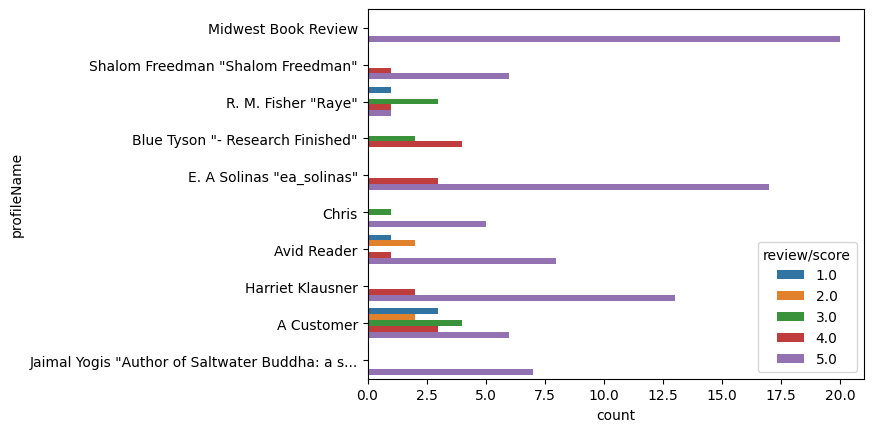

In [115]:
sns.countplot(data=rating_data_top_10_profile_name_only, y='profileName', hue='review/score', orient='h');

### review/month + review/score

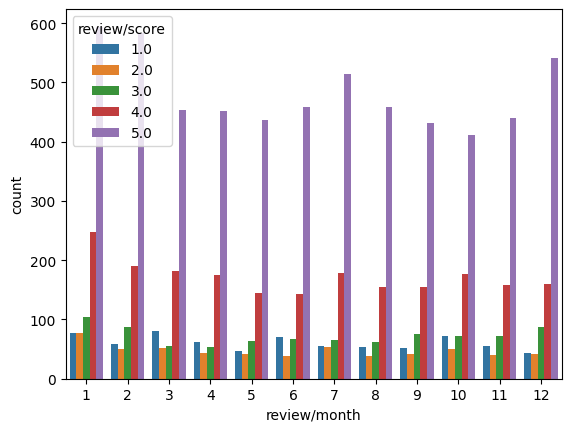

In [63]:
sns.countplot(data=rating_data, x='review/month', hue='review/score');

### review/day + target

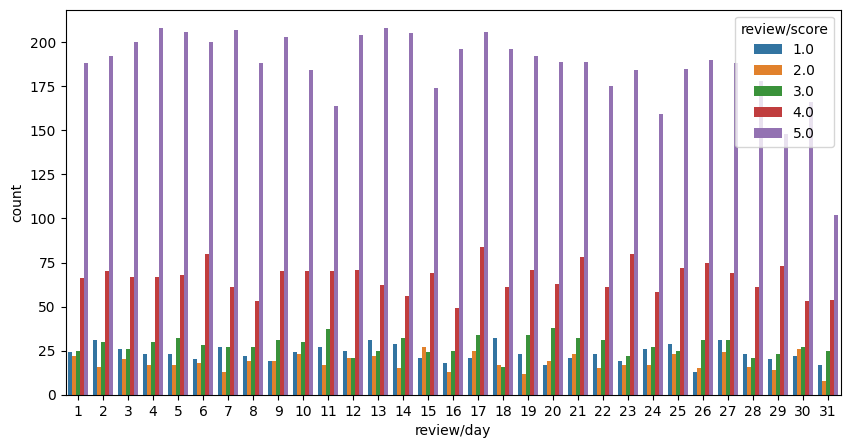

In [83]:
plt.figure(figsize=(10, 5))
sns.countplot(data=rating_data, x='review/day', hue='review/score');

### review/year + target

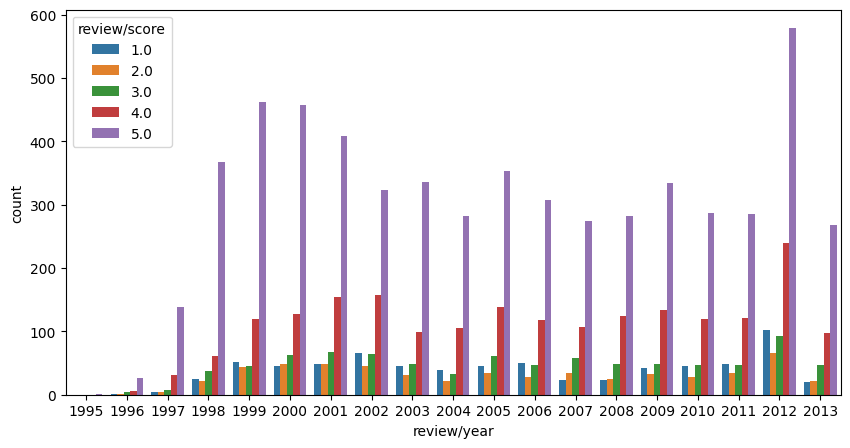

In [84]:
plt.figure(figsize=(10, 5))
sns.countplot(data=rating_data, x='review/year', hue='review/score');

In [85]:
rating_data.columns

Index(['Unnamed: 0', 'Id', 'Title', 'Price', 'User_id', 'profileName',
       'review/helpfulness', 'review/score', 'review/time', 'review/summary',
       'review/text', 'review/month', 'review/day', 'review/year',
       'review/summary_char_len', 'review/summary_words_len',
       'review/text_char_len', 'review/text_words_len', 'review/score_str'],
      dtype='object')

In [67]:
rating_data['review/score_str'] = rating_data['review/score'].astype('string')
rating_data['review/score_str'].unique()

/var/folders/6d/5jh66dcj5s1bkyqrkzk6j2hw0000gn/T/ipykernel_29523/2696137476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_data['review/score_str'] = rating_data['review/score'].astype('string')


<StringArray>
['4.0', '5.0', '1.0', '3.0', '2.0']
Length: 5, dtype: string

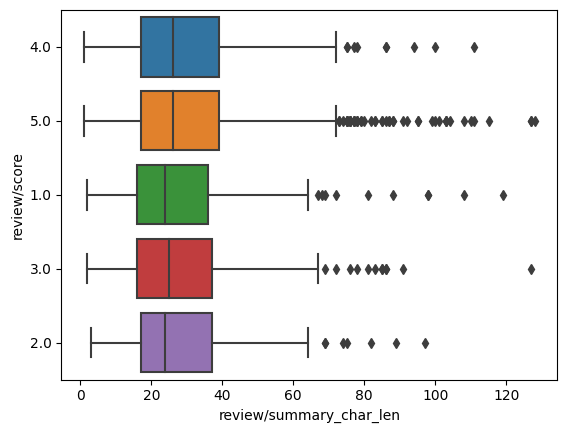

In [93]:
sns.boxplot(data=rating_data, x='review/summary_char_len', y='review/score_str');
plt.ylabel('review/score');

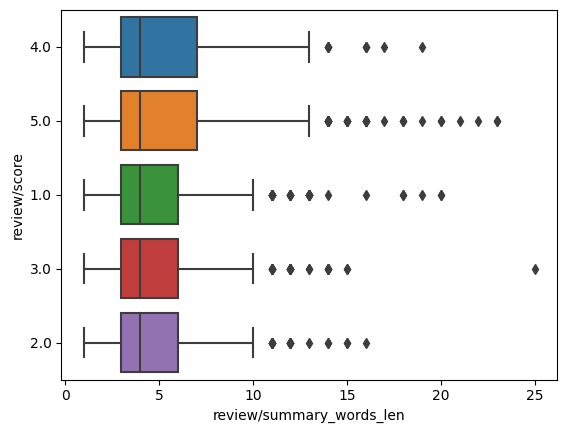

In [92]:
sns.boxplot(data=rating_data, x='review/summary_words_len', y='review/score_str');
plt.ylabel('review/score');

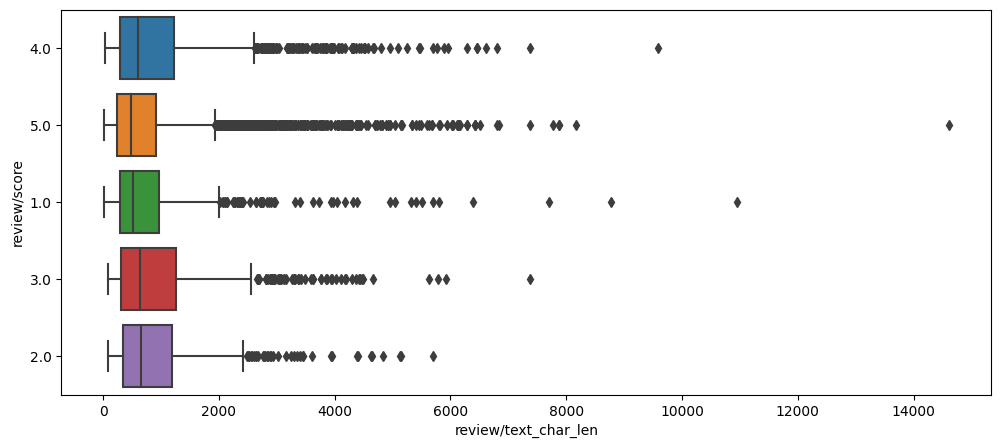

In [91]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=rating_data, x='review/text_char_len', y='review/score_str')
plt.ylabel('review/score');

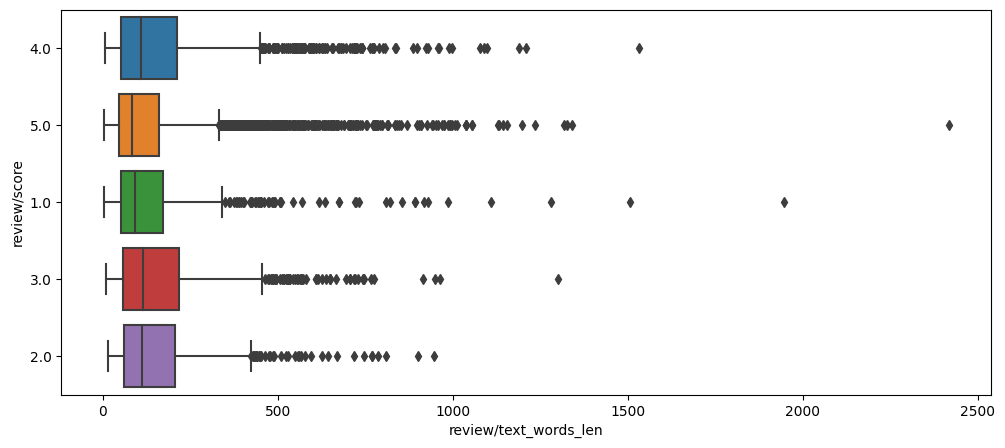

In [95]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=rating_data, x='review/text_words_len', y='review/score_str');
plt.ylabel('review/score');

### review/helpfulness + target

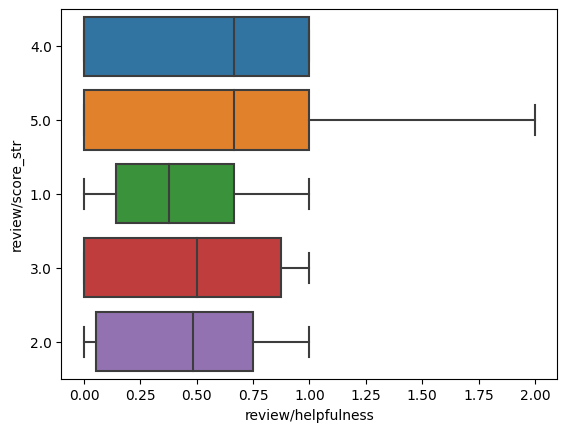

In [79]:
sns.boxplot(data=rating_data, x='review/helpfulness', y='review/score_str');

- категориальный + категориальный = столбчатая диаграмма с оттенокм (bar/barplot)
- числовой + категориальный = гистограмма с оттенокм и boxplot с оттенком
- числовой + числовой = scatterplot 

1. Посмотреть зависимости всех признаков и целевого
2. Посмотреть зависимости всех признаков друг от друга

### User_id + Profile_name

In [69]:
user_id_profile_name_df = rating_data[['User_id', 'profileName']].drop_duplicates()

In [70]:
user_id_profile_name_df.head()

User_id                         profileName
0   AVCGYZL8FQQTD               Jim of Oz "jim-of-oz"
1  A30TK6U7DNS82R                       Kevin Killian
2  A3UH4UZ4RSVO82                        John Granger
3  A2MVUWT453QH61  Roy E. Perry "amateur philosopher"
4  A22X4XUPKF66MR     D. H. Richards "ninthwavestore"

In [71]:
user_id_profile_name_df.duplicated().sum()

0

In [72]:
user_id_profile_name_df.shape

(7563, 2)

In [73]:
len(user_id_profile_name_df.User_id.unique())

7563

In [74]:
len(user_id_profile_name_df.profileName.unique())

7395

#### Сделать тоже самое для id и title

1. Нужно подобрать размер для wordcloud-ов
2. Запустить на полном датасете
3. Попробовать сделать скоры по порядку
4. Сделать тоже самое для review/text

In [75]:
rating_data['review/summary'] = rating_data['review/summary'].astype(str)

/var/folders/6d/5jh66dcj5s1bkyqrkzk6j2hw0000gn/T/ipykernel_29523/2642959534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_data['review/summary'] = rating_data['review/summary'].astype(str)


In [76]:
scores_lst = rating_data['review/score'].unique().sort()

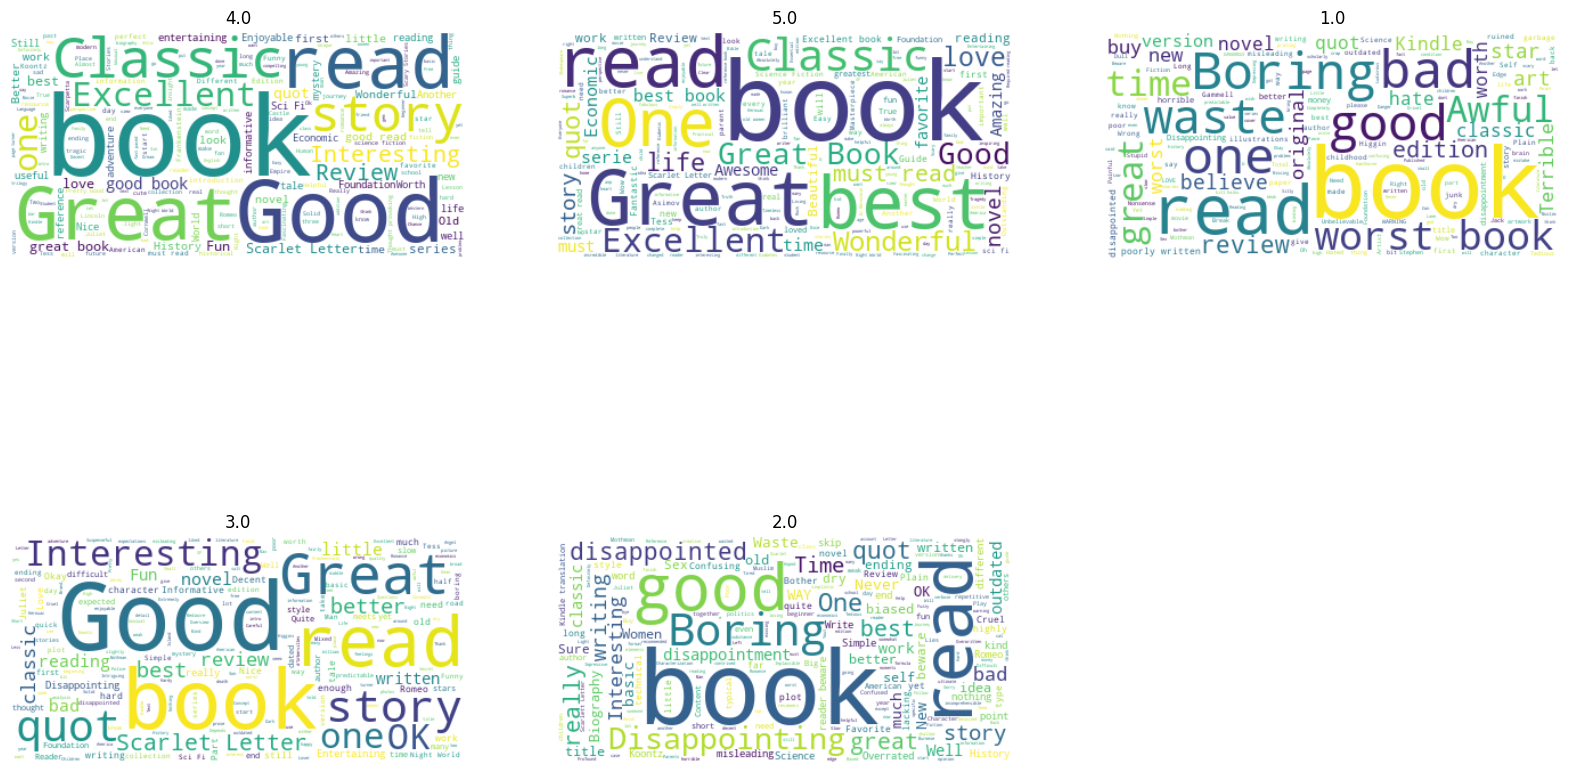

In [77]:
fig = plt.figure(figsize=(20, 12))
fig.subplots_adjust()#(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

plot_amount = [i for i in range(len(rating_data['review/score'].unique()))]

for i, current_score in zip(plot_amount, rating_data['review/score'].unique()):
  current_df = rating_data[rating_data['review/score'] == current_score]
  ax = fig.add_subplot(2, 3, i + 1, xticks=[], yticks=[])
  current_text = " ".join(i for i in current_df['review/summary'])
  wordcloud = WordCloud(background_color="white").generate(current_text)
  ax.imshow(wordcloud, interpolation='bilinear')
  ax.axis("off")
  ax.set_title(current_score);

/var/folders/6d/5jh66dcj5s1bkyqrkzk6j2hw0000gn/T/ipykernel_29523/2741018506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_data['review/text'] = rating_data['review/text'].astype(str)


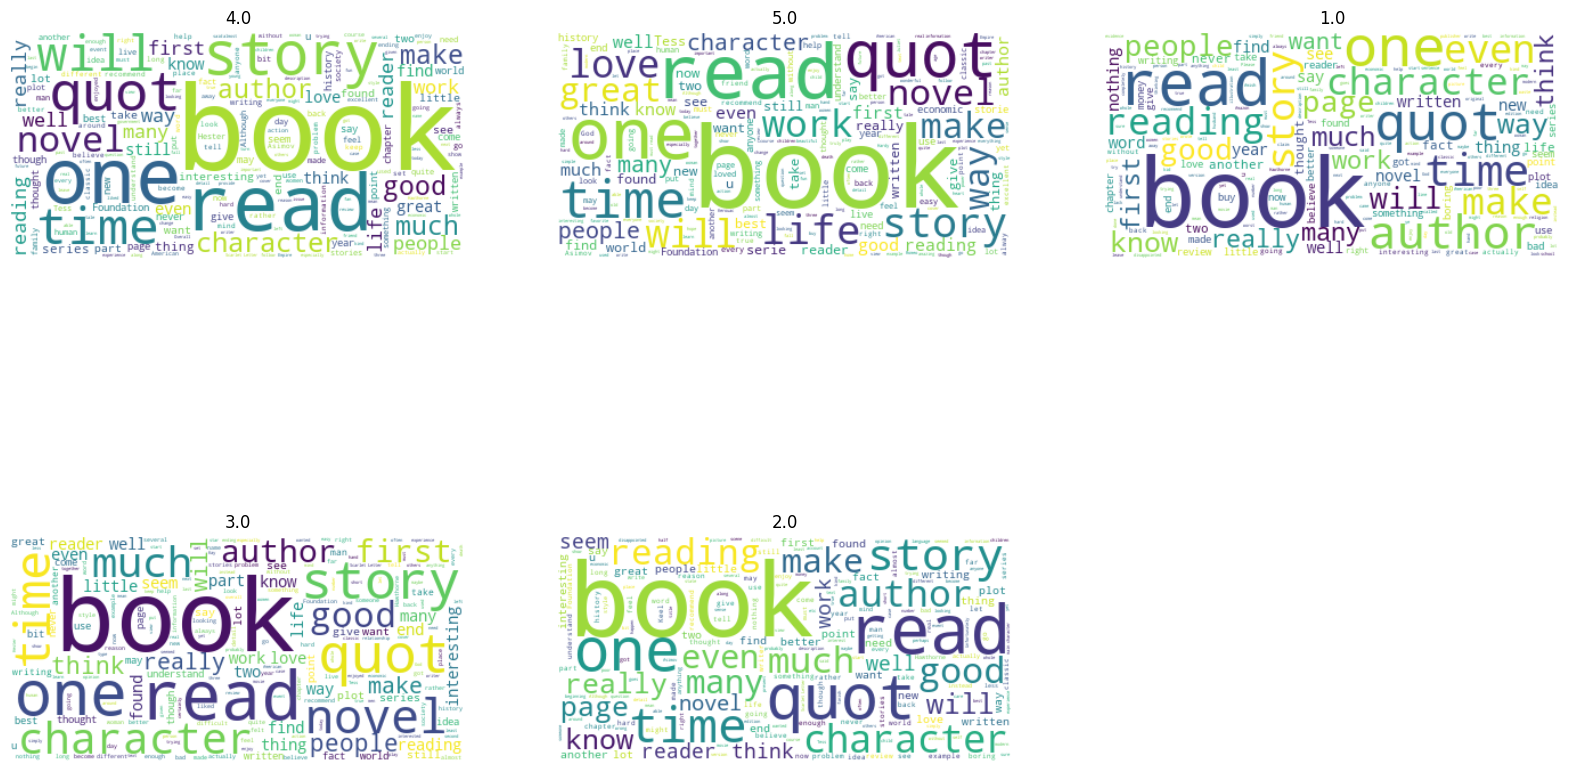

In [78]:
rating_data['review/text'] = rating_data['review/text'].astype(str)
scores_lst = rating_data['review/score'].unique().sort()

fig = plt.figure(figsize=(20, 12))
fig.subplots_adjust()#(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

plot_amount = [i for i in range(len(rating_data['review/score'].unique()))]

for i, current_score in zip(plot_amount, rating_data['review/score'].unique()):
  current_df = rating_data[rating_data['review/score'] == current_score]
  ax = fig.add_subplot(2, 3, i + 1, xticks=[], yticks=[])
  current_text = " ".join(i for i in current_df['review/text'])
  wordcloud = WordCloud(background_color="white").generate(current_text)
  ax.imshow(wordcloud, interpolation='bilinear')
  ax.axis("off")
  ax.set_title(current_score);

matplotlib.pyplot.savefig для сохранения графиков в файл

# Предобработка

-----------------------------Предобработка-----------------------------

-----Колонки-----

удалить price(более 70% пропусков), ratingsCount(более 70% пропусков), image(работаем только с текстом), previewLink(ссылка), infoLink(ссылка)

привести review/time к одному виду(сделано в разведочном анализе)

удалить дубликаты

обрезать review/helpfuness

sin/cos для time

удалить пропуски review/summary, review/text, title

заменить пропуски User_id, profileName

вынести списки признаков

-----Очистка мусора-----

перевести текст в нижний регистр

удалить теги

удалить спец. символы

удалить пунктуацию

удалить лидирующие и конечные пробелы (пример: ' a b c  ' -> 'a b c')

stemming

-----Извлечение признаков-----

encoding для категориальных признаков (categories)

vectorizer (tf-idf) с удалением стоп-слов

Предварительная зачистка

In [ ]:
# удалить price
rating_data = rating_data.drop(columns='Price')

# удалить дубликаты
rating_data = rating_data.drop_duplicates()

# обрезать review/helpfuness
rating_data['review/helpfulness'] = rating_data['review/helpfulness'].apply(lambda x: 1.0 if x >= 1.0 else x)

# sin/cos с time
rating_data['review/month_sin'] = np.sin(2 * np.pi * rating_data['review/month'] / 12)
rating_data['review/month_cos'] = np.cos(2 * np.pi * rating_data['review/month'] / 12)

rating_data['review/day_sin'] = np.sin(2 * np.pi * rating_data['review/day'] / 31)
rating_data['review/day_cos'] = np.cos(2 * np.pi * rating_data['review/day'] / 31)

# удаление пропусков в summary, text, title
rating_data = rating_data[rating_data['review/summary'].notna()]
rating_data = rating_data[rating_data['review/text'].notna()]
rating_data = rating_data[rating_data['Title'].notna()]

# замена пропусков в User_id, profileName
rating_data['User_id'] = rating_data['User_id'].fillna('user_id_unknown')
rating_data['profileName'] = rating_data['profileName'].fillna('profile_unknown')

In [4]:
rating_data.isna().sum()

Id                          0
Title                       0
User_id                     0
profileName                 0
review/helpfulness          0
review/score                0
review/time                 0
review/summary              0
review/text                 0
review/month                0
review/day                  0
review/year                 0
review/summary_char_len     0
review/summary_words_len    0
review/text_char_len        0
review/text_words_len       0
review/month_sin            0
review/month_cos            0
review/day_sin              0
review/day_cos              0
dtype: int64

In [11]:
rating_data.head(5)

Id                           Title         User_id  \
0  1882931173  Its Only Art If Its Well Hung!   AVCGYZL8FQQTD   
1  0826414346        Dr. Seuss: American Icon  A30TK6U7DNS82R   
2  0826414346        Dr. Seuss: American Icon  A3UH4UZ4RSVO82   
3  0826414346        Dr. Seuss: American Icon  A2MVUWT453QH61   
4  0826414346        Dr. Seuss: American Icon  A22X4XUPKF66MR   

                          profileName  review/helpfulness  review/score  \
0               Jim of Oz "jim-of-oz"            1.000000           4.0   
1                       Kevin Killian            1.000000           5.0   
2                        John Granger            0.909091           5.0   
3  Roy E. Perry "amateur philosopher"            1.000000           4.0   
4     D. H. Richards "ninthwavestore"            1.000000           4.0   

  review/time                                   review/summary  \
0  1999-10-23           Nice collection of Julie Strain images   
1  2004-09-21                                Really Enjoyed It   
2  2004-03-09  Essential for every personal and Public Library   
3  2004-07-25  Phlip Nel gives silly Seuss a serious treatment   
4  2005-02-10                           Good academic overview   

                                         review/text  review/month  \
0  This is only for Julie Strain fans. It's a col...            10   
1  I don't care much for Dr. Seuss but after read...             9   
2  If people become the books they read and if "t...             3   
3  Theodore Seuss Geisel (1904-1991), aka &quot;D...             7   
4  Philip Nel - Dr. Seuss: American IconThis is b...             2   

   review/day  review/year  review/summary_char_len  review/summary_words_len  \
0          23         1999                       38                         6   
1          21         2004                       17                         3   
2           9         2004                       47                         7   
3          25         2004                       47                         8   
4          10         2005                       22                         3   

   review/text_char_len  review/text_words_len  review/month_sin  \
0                   457                     86         -0.866025   
1                  1423                    252         -1.000000   
2                  1752                    310          1.000000   
3                  3662                    560         -0.500000   
4                  1542                    273          0.866025   

   review/month_cos  review/day_sin  review/day_cos  
0      5.000000e-01       -0.998717       -0.050649  
1     -1.836970e-16       -0.897805       -0.440394  
2      6.123234e-17        0.968077       -0.250653  
3     -8.660254e-01       -0.937752        0.347305  
4      5.000000e-01        0.897805       -0.440394

Удаление text с малой длиной (поиск бессмыслицы)

In [46]:
short_text_15 = rating_data[rating_data['review/text_char_len'] <= 15]
short_text_15['review/text'].head(50)

1033             Very goo
15752          PROPHETIC!
16697     Gillian Anderso
18080                 yes
18891                   1
20594                 Why
20772            i love i
26772           Fantastic
29681           It sucked
30582                1,00
31344     One of the best
43697      TYPICS PROBLEM
47585        This book Su
50954      To many detail
59941            good boo
60681                 yes
71964         i don't kno
76228      yuhfhfhdd h fh
82050              histor
82166              afadfd
82818                   1
87151           I like it
88746          1000% grea
90876      Test review...
95043         HAHAHHAH696
99972                 oka
103214        HAHAHHAH696
110991          Loved it!
112381                HUH
120393    speech to fast.
120938         DUH DUH DU
122052        I loved it.
126061                 ee
131950             I like
135258    I expected more
136389           good boo
140455              asdas
143995         good progr
147226    i 

Выкинуть <= 20

In [4]:
short_text_20 = rating_data[rating_data['review/text_char_len'] <= 20]
short_text_20['review/text']

1033                 Very goo
4606       A good mystery-boo
7048       Length:: 4:02 Mins
15752              PROPHETIC!
16697         Gillian Anderso
                  ...        
2973659      You must read it
2974306        Test review...
2975616            1000% grea
2976301             I like it
2997770                   goo
Name: review/text, Length: 885, dtype: object

In [44]:
short_text_25 = rating_data[rating_data['review/text_char_len'] <= 25]
short_text_25['review/text'].head(50)

1033                      Very goo
2493        It is a spanish editio
4554      The book was really good
4606            A good mystery-boo
7043        A great Read....enjoy.
7048            Length:: 4:02 Mins
7898     I Loved It...Didn't You??
10252    I Loved It...Didn't You??
15752                   PROPHETIC!
16697              Gillian Anderso
18080                          yes
18891                            1
18923     The author shows promise
20594                          Why
20636        Iloved the sex parts.
20772                     i love i
21459           oooooooooooookkkkk
26772                    Fantastic
29202            VERY WELL WRITTEN
29681                    It sucked
29839           Length:: 0:39 Mins
30582                         1,00
31344              One of the best
34434    a very well designed book
42979    WOW, that's all I can say
43697               TYPICS PROBLEM
47585                 This book Su
47643       A very interesting boo
50954               

In [43]:
short_text_30 = rating_data[rating_data['review/text_char_len'] <= 30]
short_text_30['review/text'].head(50)

542       THE BEST BOOK I READ IN YEARS
1033                           Very goo
2493             It is a spanish editio
4161      A very good book! A must read
4554           The book was really good
4606                 A good mystery-boo
6159       A great book! A great writer
6689       Exceptionally fine narrative
7043             A great Read....enjoy.
7048                 Length:: 4:02 Mins
7898          I Loved It...Didn't You??
8451        Recieved in Good Condition.
10252         I Loved It...Didn't You??
10815      I went to buy the book pleas
13786     I think my title says enough.
15042        1984 only 4.5 stars rectif
15752                        PROPHETIC!
16697                   Gillian Anderso
17065    I don't know nothing about tha
18080                               yes
18107      this is a good book. buy it.
18189        The novel is a mind worker
18891                                 1
18923          The author shows promise
20476    read it and you will know why!


Выкинуть summary с малой длиной (поиск бессмыслицы)

In [41]:
short_summary_10 = rating_data[rating_data['review/text_char_len'] <= 10]
short_summary_10['review/text'].head(50)

1033        Very goo
15752     PROPHETIC!
18080            yes
18891              1
20594            Why
20772       i love i
26772      Fantastic
29681      It sucked
30582           1,00
59941       good boo
60681            yes
82050         histor
82166         afadfd
82818              1
87151      I like it
88746     1000% grea
99972            oka
110991     Loved it!
112381           HUH
120938    DUH DUH DU
126061            ee
131950        I like
136389      good boo
140455         asdas
143995    good progr
149737        fdsafd
153447             w
168186       terribl
203068      must rea
206125           tes
209771         buy i
222290          1,00
228791         Decen
234535      good boo
239081      Good Boo
260273           END
266735        afadfd
270072      excellen
277731    Fabulous!!
315497            wo
338074           Coo
349664    No comment
375893     Loved it!
377650        125636
410567    1000% grea
412255     I like it
450139    very stupi
455421      w

Убрать <= 7

In [5]:
short_summary_7 = rating_data[rating_data['review/text_char_len'] <= 7]
short_summary_7['review/text']

18080          yes
18891            1
20594          Why
30582         1,00
60681          yes
            ...   
2908347         he
2911407    bad boo
2946242         wo
2950375        Goo
2997770        goo
Name: review/text, Length: 169, dtype: object

Удаление записей с summary <= 7 и review/text <= 20

In [48]:
len(rating_data)

2988182

In [6]:
rating_data = rating_data.drop(list(short_summary_7.index.unique()) + list(short_text_20.index.unique()))

In [8]:
len(rating_data)

2987297

Удаление отзывов с нелатинскими символами в summary и review/text (их нет)

In [22]:
symbols = set()

def countSymbos(data):
    for sym in data:
        if sym not in symbols:
            symbols.add(sym)

In [23]:
rating_data['review/summary'].apply(countSymbos)
rating_data['review/text'].apply(countSymbos)

In [24]:
symbols

{'\x01',
 '\x02',
 '\x03',
 '\x04',
 '\x05',
 '\x06',
 '\x07',
 '\x08',
 '\x0e',
 '\x0f',
 '\x10',
 '\x11',
 '\x12',
 '\x13',
 '\x14',
 '\x15',
 '\x16',
 '\x17',
 '\x18',
 '\x19',
 '\x1b',
 '\x1d',
 '\x1f',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '=',
 '>',
 '?',
 '@',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f'}

Функция предобработки текста

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import regex as re
import string
#from num2words import num2words
from bs4 import BeautifulSoup

stemmer = PorterStemmer()
stop_words = stopwords.words('english')
def text_preprocessing(text):
    text = str(text)

    # числа в слова
    # nums = re.findall(r'[0-9]+\.?[0-9]*', text)
    # for num in nums:
    #    text = text.replace(num, num2words(num))

    # нижний регистр
    text = text.lower()

    # очистка тегов
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    text = soup.get_text()

    # удалить спец. символы
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)

    # удалить лидирующие пробелы
    text = text.strip()

    # удалить пунктуакцию
    text = text.translate(text.maketrans('', '', string.punctuation))

    # stemming
    text = word_tokenize(text)
    text = [word for word in text if word not in stop_words]
    text = ' '.join(text)

    return text

In [7]:
rating_data['review/summary'] = rating_data['review/summary'].apply(text_preprocessing)
rating_data.to_csv('preprocessed_summary.csv', index=False)

In [ ]:
part_1 = rating_data[:500000]
part_2 = rating_data[500000 : 1000000]
part_3 = rating_data[1000000 : 1500000]
part_4 = rating_data[1500000 : 2000000]
part_5 = rating_data[2000000 : 2500000]
part_6 = rating_data[2500000:]

In [6]:
from pandarallel import pandarallel
pandarallel.initialize()

part_1['review/text'] = part_1['review/text'].parallel_apply(text_preprocessing)

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


/tmp/ipykernel_1572/2337581857.py:24: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
/tmp/ipykernel_1572/2337581857.py:24: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
/tmp/ipykernel_1572/2337581857.py:24: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
/tmp/ipykernel_1572/1888102919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [10]:
from pandarallel import pandarallel
pandarallel.initialize()
part_2['review/text'] = part_2['review/text'].parallel_apply(text_preprocessing)

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


/tmp/ipykernel_1564/2337581857.py:24: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
/tmp/ipykernel_1564/2337581857.py:24: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
/tmp/ipykernel_1564/2337581857.py:24: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [ ]:
from pandarallel import pandarallel
pandarallel.initialize()

part_3['review/text'] = part_3['review/text'].parallel_apply(text_preprocessing)

In [ ]:
from pandarallel import pandarallel
pandarallel.initialize()

part_4['review/text'] = part_4['review/text'].parallel_apply(text_preprocessing)

In [ ]:
from pandarallel import pandarallel
pandarallel.initialize()

part_5['review/text'] = part_5['review/text'].parallel_apply(text_preprocessing)

In [ ]:
from pandarallel import pandarallel
pandarallel.initialize()

part_6['review/text'] = part_6['review/text'].parallel_apply(text_preprocessing)

In [50]:
rating_data.to_csv('full_preprocessed.csv')

# Learning

In [2]:
rating_data = pd.read_csv('preprocessed_clean_full.csv')

Списки признаков

In [28]:
rating_data.columns

Index(['Id', 'Title', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text',
       'review/month', 'review/day', 'review/year', 'review/summary_char_len',
       'review/summary_words_len', 'review/text_char_len',
       'review/text_words_len', 'review/month_sin', 'review/month_cos',
       'review/day_sin', 'review/day_cos'],
      dtype='object')

In [3]:
# Id - id книги(не отзыва), поэтому категориальный
target  = 'review/score'
categorial_features = ['Id', 'Title', 'User_id', 'profileName', 'review/year']
num_features = ['review/helpfulness', 'review/summary_char_len', 'review/summary_words_len',
       'review/text_char_len', 'review/text_words_len']
text_features = ['review/summary', 'review/text']

already_proccessed_features = ['review/month_sin', 'review/month_cos',
       'review/day_sin', 'review/day_cos']
all_features = [*categorial_features, *num_features, *text_features, *already_proccessed_features]
all_features

['Id',
 'Title',
 'User_id',
 'profileName',
 'review/year',
 'review/helpfulness',
 'review/summary_char_len',
 'review/summary_words_len',
 'review/text_char_len',
 'review/text_words_len',
 'review/summary',
 'review/text',
 'review/month_sin',
 'review/month_cos',
 'review/day_sin',
 'review/day_cos']

Функция, которая возвращает pipeline на основе columnTransformer

Возможно, стоит добавить Наивного Байеса.

И нужно добавить ансамбли - Random Forest из sklearn и cat boost, xgboost, lgmboost из отдельных библиотек. До кучи можно добавить нейросеть пока из sklearn MLPClassifier

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, tree
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline

import catboost as ctb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

def getPipeline(_encoder = OneHotEncoder(),
                _scaler = MinMaxScaler(),
                _decomposer = PCA(),
                _classificator = KNeighborsClassifier()):
    preprocessor = ColumnTransformer([
        ("encoding", _encoder, categorial_features),
        ("scaling", _scaler, num_features)],
        remainder='passthrough')
    
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('decomposer', _decomposer),
        ('classificator', _classificator)
    ])

    return pipe

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin

class TSNEWrapper(BaseEstimator, TransformerMixin):
    def __init__(self, n_components, random_state=None, method='exact'):
        self.n_components = n_components
        self.method = method
        self.random_state = random_state

    def fit(self, X, y = None):
        ts = TSNE(n_components = self.n_components,
        method = self.method, random_state = self.random_state)
        self.X_tsne = ts.fit_transform(X)
        return self

    def transform(self, X, y = None):
        return X

In [26]:
encoders = [OneHotEncoder(), OrdinalEncoder()]
vectorizers = [TfidfVectorizer(), CountVectorizer()]
scalers = [MinMaxScaler(), StandardScaler(), RobustScaler()]
decomposers = [PCA(), TSNE()]
# протестировать с разными параметрами

simple_classifiers = [KNeighborsClassifier(), svm.SVC(), tree.DecisionTreeClassifier(), 
                  LogisticRegression(), SGDClassifier()]

ensemble_classifiers = [ctb.CatBoostClassifier(), xgb.XGBClassifier(),
                  RandomForestClassifier()]


Надо сначала посчитать несколько метрик для вашего датасета - ф скор с микро, макро и взвешенным усреднением и рок аук; а потом выбрать ту, которая циферки получше покажет, и перезапустить только с ней. Ну либо забацать полноценное исследование с ними четырьмя, если все 4 неплохие результаты покажут
И, наверное, лучше сделать три раздела для анализа - отдельно простые методы, отдельно ансамбли и отдельно многослойный перцептрон.

Тест getPipeline(в процессе)

metrics.f1_score
‘f1_micro’
‘f1_macro’
‘f1_weighted’

metrics.roc_auc_score
‘roc_auc’

In [40]:
import itertools

all_combos_with_simple_classifiers = [encoders, scalers, decomposers, simple_classifiers]
all_combos_with_ensemble_classifiers = [encoders, scalers, decomposers, ensemble_classifiers]

simple_classifeir_combos = [part for part in itertools.product(*all_combos_with_simple_classifiers)]
ensemble_classifier_combos = [part for part in itertools.product(*all_combos_with_ensemble_classifiers)]


In [41]:
simple_classifeir_combos

[(OneHotEncoder(),
  TfidfVectorizer(),
  MinMaxScaler(),
  PCA(),
  KNeighborsClassifier()),
 (OneHotEncoder(), TfidfVectorizer(), MinMaxScaler(), PCA(), SVC()),
 (OneHotEncoder(),
  TfidfVectorizer(),
  MinMaxScaler(),
  PCA(),
  DecisionTreeClassifier()),
 (OneHotEncoder(),
  TfidfVectorizer(),
  MinMaxScaler(),
  PCA(),
  LogisticRegression()),
 (OneHotEncoder(), TfidfVectorizer(), MinMaxScaler(), PCA(), SGDClassifier()),
 (OneHotEncoder(),
  TfidfVectorizer(),
  MinMaxScaler(),
  TSNE(),
  KNeighborsClassifier()),
 (OneHotEncoder(), TfidfVectorizer(), MinMaxScaler(), TSNE(), SVC()),
 (OneHotEncoder(),
  TfidfVectorizer(),
  MinMaxScaler(),
  TSNE(),
  DecisionTreeClassifier()),
 (OneHotEncoder(),
  TfidfVectorizer(),
  MinMaxScaler(),
  TSNE(),
  LogisticRegression()),
 (OneHotEncoder(), TfidfVectorizer(), MinMaxScaler(), TSNE(), SGDClassifier()),
 (OneHotEncoder(),
  TfidfVectorizer(),
  StandardScaler(),
  PCA(),
  KNeighborsClassifier()),
 (OneHotEncoder(), TfidfVectorizer(), S

In [5]:
# разделение данных на тренировочные и тестируемые
X = rating_data[all_features][:100]
Y = rating_data['review/score'][:100]

In [6]:
tf = TfidfVectorizer()
text_vec = tf.fit_transform(X['review/text']).toarray()
summary_vec = tf.fit_transform(X['review/summary']).toarray()

In [20]:
text_vec.shape

(5000, 36956)

In [21]:
summary_vec.shape

(5000, 3666)

In [7]:
text_vec_cols = ['text_tf_idf_' + str(i) for i in range(text_vec.shape[1])]
text_vec_df = pd.DataFrame(text_vec, columns=text_vec_cols)
text_vec_df

text_tf_idf_0  text_tf_idf_1  text_tf_idf_2  text_tf_idf_3  text_tf_idf_4  \
0        0.000000       0.000000       0.000000       0.000000            0.0   
1        0.000000       0.000000       0.000000       0.000000            0.0   
2        0.000000       0.000000       0.000000       0.000000            0.0   
3        0.048914       0.048914       0.048914       0.048914            0.0   
4        0.000000       0.000000       0.000000       0.000000            0.0   
..            ...            ...            ...            ...            ...   
95       0.000000       0.000000       0.000000       0.000000            0.0   
96       0.000000       0.000000       0.000000       0.000000            0.0   
97       0.000000       0.000000       0.000000       0.000000            0.0   
98       0.000000       0.000000       0.000000       0.000000            0.0   
99       0.000000       0.000000       0.000000       0.000000            0.0   

    text_tf_idf_5  text_tf_idf_6  text_tf_idf_7  text_tf_idf_8  text_tf_idf_9  \
0        0.000000            0.0            0.0            0.0            0.0   
1        0.000000            0.0            0.0            0.0            0.0   
2        0.000000            0.0            0.0            0.0            0.0   
3        0.000000            0.0            0.0            0.0            0.0   
4        0.000000            0.0            0.0            0.0            0.0   
..            ...            ...            ...            ...            ...   
95       0.000000            0.0            0.0            0.0            0.0   
96       0.090722            0.0            0.0            0.0            0.0   
97       0.000000            0.0            0.0            0.0            0.0   
98       0.000000            0.0            0.0            0.0            0.0   
99       0.000000            0.0            0.0            0.0            0.0   

    ...  text_tf_idf_2981  text_tf_idf_2982  text_tf_idf_2983  \
0   ...          0.000000          0.000000          0.000000   
1   ...          0.000000          0.095135          0.000000   
2   ...          0.000000          0.000000          0.000000   
3   ...          0.000000          0.000000          0.048914   
4   ...          0.000000          0.000000          0.000000   
..  ...               ...               ...               ...   
95  ...          0.000000          0.000000          0.000000   
96  ...          0.102291          0.000000          0.000000   
97  ...          0.000000          0.000000          0.000000   
98  ...          0.000000          0.000000          0.000000   
99  ...          0.082364          0.000000          0.000000   

    text_tf_idf_2984  text_tf_idf_2985  text_tf_idf_2986  text_tf_idf_2987  \
0           0.000000           0.00000          0.000000          0.000000   
1           0.000000           0.00000          0.000000          0.000000   
2           0.000000           0.05527          0.000000          0.059767   
3           0.000000           0.00000          0.042026          0.000000   
4           0.000000           0.00000          0.000000          0.000000   
..               ...               ...               ...               ...   
95          0.000000           0.00000          0.000000          0.000000   
96          0.000000           0.00000          0.000000          0.000000   
97          0.000000           0.00000          0.000000          0.000000   
98          0.064687           0.00000          0.000000          0.000000   
99          0.154236           0.00000          0.000000          0.000000   

    text_tf_idf_2988  text_tf_idf_2989  text_tf_idf_2990  
0           0.110674               0.0               0.0  
1           0.000000               0.0               0.0  
2           0.000000               0.0               0.0  
3           0.000000               0.0               0.0  
4           0.000000               0.0       

In [8]:
summary_vec_cols = ['summary_tf_idf_' + str(i) for i in range(summary_vec.shape[1])]
summary_vec_df = pd.DataFrame(summary_vec, columns=summary_vec_cols)
summary_vec_df

summary_tf_idf_0  summary_tf_idf_1  summary_tf_idf_2  summary_tf_idf_3  \
0                0.0               0.0               0.0               0.0   
1                0.0               0.0               0.0               0.0   
2                0.0               0.0               0.0               0.0   
3                0.0               0.0               0.0               0.0   
4                0.0               0.0               0.0               0.0   
..               ...               ...               ...               ...   
95               0.0               0.0               0.0               0.0   
96               0.0               0.0               0.0               0.0   
97               0.0               0.0               0.0               0.0   
98               0.0               0.0               0.0               0.0   
99               0.0               0.0               0.0               0.0   

    summary_tf_idf_4  summary_tf_idf_5  summary_tf_idf_6  summary_tf_idf_7  \
0           0.000000               0.0               0.0               0.0   
1           0.000000               0.0               0.0               0.0   
2           0.000000               0.0               0.0               0.0   
3           0.000000               0.0               0.0               0.0   
4           0.619767               0.0               0.0               0.0   
..               ...               ...               ...               ...   
95          0.000000               0.0               0.0               0.0   
96          0.000000               0.0               0.0               0.0   
97          0.000000               0.0               0.0               0.0   
98          0.000000               0.0               0.0               0.0   
99          0.000000               0.0               0.0               0.0   

    summary_tf_idf_8  summary_tf_idf_9  ...  summary_tf_idf_266  \
0                0.0               0.0  ...                 0.0   
1                0.0               0.0  ...                 0.0   
2                0.0               0.0  ...                 0.0   
3                0.0               0.0  ...                 0.0   
4                0.0               0.0  ...                 0.0   
..               ...               ...  ...                 ...   
95               0.0               0.0  ...                 0.0   
96               0.0               0.0  ...                 0.0   
97               0.0               0.0  ...                 0.0   
98               0.0               0.0  ...                 0.0   
99               0.0               0.0  ...                 0.0   

    summary_tf_idf_267  summary_tf_idf_268  summary_tf_idf_269  \
0                  0.0                 0.0            0.000000   
1                  0.0                 0.0            0.000000   
2                  0.0                 0.0            0.000000   
3                  0.0                 0.0            0.000000   
4                  0.0                 0.0            0.000000   
..                 ...                 ...                 ...   
95                 0.0                 0.0            0.000000   
96                 0.0                 0.0            0.000000   
97                 0.0                 0.0            0.429943   
98                 0.0                 0.0            0.000000   
99                 0.0                 0.0            0.000000   

    summary_tf_idf_270  summary_tf_idf_271  summary_tf_idf_272  \
0                  0.0                 0.0                 0.0   
1                  0.0                 0.0                 0.0   
2                  0.0                 0.0                 0.0   
3                  0.0                 0.0                 0.0   
4                  0.0                 0.0                 0.0   
..                 ...                 ...                 ...   
95                 0.0                 0.0                 0.0   
96  

In [9]:
X = pd.concat([X, text_vec_df], axis=1)
X

Id                           Title         User_id  \
0   1882931173  Its Only Art If Its Well Hung!   AVCGYZL8FQQTD   
1   0826414346        Dr. Seuss: American Icon  A30TK6U7DNS82R   
2   0826414346        Dr. Seuss: American Icon  A3UH4UZ4RSVO82   
3   0826414346        Dr. Seuss: American Icon  A2MVUWT453QH61   
4   0826414346        Dr. Seuss: American Icon  A22X4XUPKF66MR   
..         ...                             ...             ...   
95  B000NKGYMK                Alaska Sourdough  A2UMP9TJTJ6A6B   
96  B000NKGYMK                Alaska Sourdough   AC2TK7NHKB5C0   
97  B000NKGYMK                Alaska Sourdough  A22T74YNRM8NTK   
98  B000NKGYMK                Alaska Sourdough  A2E0GB5QZRX2JZ   
99  B000NKGYMK                Alaska Sourdough   A7VSVB6Z0JHOV   

                                profileName  review/year  review/helpfulness  \
0                     Jim of Oz "jim-of-oz"         1999            1.000000   
1                             Kevin Killian         2004            1.000000   
2                              John Granger         2004            0.909091   
3        Roy E. Perry "amateur philosopher"         2004            1.000000   
4           D. H. Richards "ninthwavestore"         2005            1.000000   
..                                      ...          ...                 ...   
95  happygardeningmama "happygardeningmama"         2011            0.875000   
96                Kiki B. "The Shepherdess"         2009            1.000000   
97                               Heddlemaid         2005            0.800000   
98              Linda Pool "cookbookaholic"         2009            0.833333   
99                               C.J. Whale         2012            1.000000   

    review/summary_char_len  review/summary_words_len  review/text_char_len  \
0                        38                         6                   457   
1                        17                         3                  1423   
2                        47                         7                  1752   
3                        47                         8                  3662   
4                        22                         3                  1542   
..                      ...                       ...                   ...   
95                       16                         2                   951   
96                       30                         5                   990   
97                       39                         7                   196   
98                       15                         4                  1839   
99                       32                         5                  1150   

    review/text_words_len  ... text_tf_idf_2981 text_tf_idf_2982  \
0                      86  ...         0.000000         0.000000   
1                     252  ...         0.000000         0.095135   
2                     310  ...         0.000000         0.000000   
3                     560  ...         0.000000         0.000000   
4                     273  ...         0.000000         0.000000   
..                    ...  ...              ...              ...   
95                    160  ...         0.000000         0.000000   
96                    180  ...         0.102291         0.000000   
97                     34  ...         0.000000         0.000000   
98                    361  ...         0.000000         0.000000   
99                    214  ...         0.082364         0.000000   

    text_tf_idf_2983  text_tf_idf_2984  text_tf_idf_2985  text_tf_idf_2986  \
0           0.000000          0.000000           0.00000          0.000000   
1           0.000000          0.000000           0.00000          0.000000   
2           0.000000          0.000000           0.05527          0.000000   
3           0.048914          0.000000           0.00000          0.042026   
4           0.000000          0.000000           0.00000          0.000000   
..               ...    

In [25]:
X.shape

(5000, 16)

In [26]:
text_vec_df.shape

(5000, 36956)

In [10]:
X = pd.concat([X, summary_vec_df], axis=1)
X.head(5)

Id                           Title         User_id  \
0  1882931173  Its Only Art If Its Well Hung!   AVCGYZL8FQQTD   
1  0826414346        Dr. Seuss: American Icon  A30TK6U7DNS82R   
2  0826414346        Dr. Seuss: American Icon  A3UH4UZ4RSVO82   
3  0826414346        Dr. Seuss: American Icon  A2MVUWT453QH61   
4  0826414346        Dr. Seuss: American Icon  A22X4XUPKF66MR   

                          profileName  review/year  review/helpfulness  \
0               Jim of Oz "jim-of-oz"         1999            1.000000   
1                       Kevin Killian         2004            1.000000   
2                        John Granger         2004            0.909091   
3  Roy E. Perry "amateur philosopher"         2004            1.000000   
4     D. H. Richards "ninthwavestore"         2005            1.000000   

   review/summary_char_len  review/summary_words_len  review/text_char_len  \
0                       38                         6                   457   
1                       17                         3                  1423   
2                       47                         7                  1752   
3                       47                         8                  3662   
4                       22                         3                  1542   

   review/text_words_len  ... summary_tf_idf_266 summary_tf_idf_267  \
0                     86  ...                0.0                0.0   
1                    252  ...                0.0                0.0   
2                    310  ...                0.0                0.0   
3                    560  ...                0.0                0.0   
4                    273  ...                0.0                0.0   

   summary_tf_idf_268  summary_tf_idf_269  summary_tf_idf_270  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   summary_tf_idf_271  summary_tf_idf_272  summary_tf_idf_273  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   summary_tf_idf_274  summary_tf_idf_275  
0                 0.0                 0.0  
1                 0.0                 0.0  
2                 0.0                 0.0  
3                 0.0                 0.0  
4                 0.0                 0.0  

[5 rows x 3283 columns]

In [11]:
X = X.drop(['review/text', 'review/summary'], axis=1)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
pipe = getPipeline(OneHotEncoder(handle_unknown='ignore'), StandardScaler(), TSNEWrapper(2), RandomForestClassifier())

In [17]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Id', 'Title', 'User_id',
                                                   'profileName',
                                                   'review/year']),
                                                 ('scaling', StandardScaler(),
                                                  ['review/helpfulness',
                                                   'review/summary_char_len',
                                                   'review/summary_words_len',
                                                   'review/text_char_len',
                                                   'review/text_words_len'])])),
                ('decomposer', TSNEWrapper(n_components=2)),
                ('classificator', RandomForestClassifier())])

In [18]:
y_pred = pipe.predict(x_test)

In [19]:
pipe.score(x_test, y_test)

0.65